In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
missing_values = ["n/a", "na", "--"]

In [ ]:
df_1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-4/Additional Covid-Related Questions Rooibos,Heart and Cognitive Health Study.xlsx - Sheet1.csv', na_values = missing_values)


In [ ]:
df_2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-4/cleaned_dataset.csv', na_values = missing_values)


In [ ]:
df_2.head()

,Unnamed: 0,NUMBER,BP_Average,Weight,Height (m),Waist circumference,BMI_x,Glucose,Chol,HB,...,Has the participant noticed any recent changes in their ability to taste or smell? Answer: Y/N_i,Has the participant recently been in close contact with someone confirmed to be infected with COVID-19? Answer: Y/N_i,Please confirm that the information the participant shared is accurate to the best of their knowledge and that permission has been given to contact him/her if necessary._i,"Has the participant ever had a positive COVID-19 PCR, antibody or antigen test? Answer: Y/N_i","If so, please provide the date._i",Does the participant have any known COVID-19 comorbidities? Answer: Y/N_i,Has the participant been vaccinated against SARS-CoV-2? Answer: Y/N_i,"If not, does the participant intend to get vaccinated? Answer: Y/N_i",COVID-19 Screening Results_i,NOTE: Not all participants received a COVID screening test. The time when the Baseline sample and the Intervention sample was taken is on next sheet of this workbook._i
0,0,1,High Normal,63.1,1.67,85.0,22.63,3.5,High,16.3,...,NaN,N,Y,Y,Jun-21,N,Y,NaN,positive,NaN
1,1,2,High Normal,67.0,1.67,80.0,24.02,4.8,5.92,15.6,...,N,N,N,N,NaN,N,Y,NaN,NS=NR,NaN
2,2,8,High Normal,95.3,1.71,111.5,32.59,4.8,Hi,13.2,...,N,N,Y,N,NaN,Y,Y,NaN,negative,NaN
3,3,9,Normal,54.0,1.57,68.0,21.91,3.8,5.63,9.3,...,N,N,Y,N,NaN,N,Y,NaN,negative,NaN
4,4,11,Normal,87.6,1.64,96.0,32.77,3.3,6.87,13.5,...,N,N,Y,Y,3-Sep-21,N,Y,NaN,negative,NaN


In [ ]:
patient_code=[]
for i,row in df_1.iterrows():
  patient_code.append(row['P. Code'].split('P')[1])

In [ ]:
patient_series=pd.Series(patient_code)
patient_number=pd.to_numeric(patient_series)

In [ ]:
df_1.insert(1,column='Patient_Number', value=patient_number)
df_1.drop(['Date','P. Code','Co-Morbidities','Additional Notes'],axis=1, inplace=True)
df_1_columns=['Patient_Number','Vaccine_Type','Number_of_Doses','Side_Effects','Covid_19_Positive','Symptoms_and_Treatment',
              'Hospitalization','Co-Morbidities']
X_1=np.array(df_1)
df_1=pd.DataFrame(X_1, columns=df_1_columns)

In [ ]:
L=[]
L_less=[]
for i in df_2.columns:
  if((df_2[i].isnull().sum())<(0.5*(df_2.shape[0]))):
    L.append(i)
  else:
    L_less.append(i)

In [ ]:
df_2=df_2[L]
df_2=df_2.iloc[:,1:]

In [ ]:
def check_Obesity(s):
  if(s<18.5):
    return 'Under Weight'
  elif(s>=18.5 and s<25):
    return 'Normal'
  elif(s>=25 and s<30):
    return 'Overweight'
  elif(s>=30):
    return 'Obese'

In [ ]:
df_2.columns

Index(['NUMBER', 'BP_Average', 'Weight', 'Height (m)', 'Waist circumference',
       'BMI_x', 'Glucose', 'Chol', 'HB', 'Gender (M=1; F=2)_x', 'Age',
       'First Lang (Afr=1, Eng=2,  Xho=3)', 'Second Lang', 'Marital status',
       'Occupation', 'Hazardous exposure', 'HLE',
       'Smoking (No=1; Yes=2; prev=3)', 'Physical activity (Yes=1; No=2)',
       'PA/week', 'PA level', 'HPT (No=1; Yes=2; Unsure=3)',
       'Low/high  Blood sugar (No=1; Yes=2; Unsure=3)',
       'Fam hx CVD (No=1; Yes=2; Unsure=3)', 'High Chol',
       'Alcohol  (No=1; Yes=2)', 'Kidney problems (No=1; Yes=2)',
       'Liver problems', 'Screening date', 'Gender (M=1; F=2)_y',
       'VISIT 2 (Baseline)', 'VISIT 3 (intervention)', 'BMI_y',
       'Participant Number', 'Visit_b', 'Age of Participant_b',
       'Temperature of Participant (°C)_b',
       'Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_b',
  

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df_2.iloc[:, 47]=df_2.iloc[:, 47].fillna(method="pad", limit=2)
df_2.iloc[:, 47]=df_2.iloc[:, 47].fillna(method="bfill", limit=22)

In [ ]:
df_2.iloc[:, 48]=df_2.iloc[:, 48].fillna(method="pad", limit=2)
df_2.iloc[:, 48]=df_2.iloc[:, 48].fillna(method="bfill", limit=22)

In [ ]:
df_2.iloc[:, 61]=df_2.iloc[:, 61].fillna(method="pad", limit=2)
df_2.iloc[:, 61]=df_2.iloc[:, 61].fillna(method="bfill", limit=22)

In [ ]:
df_2.iloc[:, 62]=df_2.iloc[:, 62].fillna(method="pad", limit=2)
df_2.iloc[:, 62]=df_2.iloc[:, 62].fillna(method="bfill", limit=22)

In [ ]:
df_2.shape

(257, 63)

In [ ]:
## People who have breakthrough infection at baseline
break_through_b=[]
for i in range(len(df_2)) :
  if((df_2.iloc[i, 47]=='Y' and df_2.iloc[i, 48] in ['positive', 'positive  *'])):
    break_through_b.append('Y')
  # if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) and
    #  (non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])):
  else:
    break_through_b.append('N')
# Total number of Re_infection after being vaccinated

In [ ]:
break_through_b.count('Y')

101

In [ ]:
## People who have breakthrough infection at Intervention
break_through_i=[]
for i in range(len(df_2)) :
  if((df_2.iloc[i, 61]=='Y' and df_2.iloc[i, 62] in ['positive', 'positive  *'])):
    break_through_i.append('Y')
  # if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) and
    #  (non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])):
  else:
    break_through_i.append('N')
# Total number of Re_infection after being vaccinated

In [ ]:
break_through_i.count('Y')

63

In [ ]:
## People who have breakthrough on both
break_through_both=[]
for i in range(len(df_2)) :
  if((df_2.iloc[i, 47]=='Y' and df_2.iloc[i, 48] in ['positive', 'positive  *']) and (df_2.iloc[i, 61]=='Y' and df_2.iloc[i, 62] in ['positive', 'positive  *'])):
    break_through_both.append('Y')
  # if((non_numeric.iloc[i, 23]=='Y' and non_numeric.iloc[i, 24] in ['positive', 'positive  *']) and
    #  (non_numeric.iloc[i, 37]=='Y' and non_numeric.iloc[i, 38] in ['positive', 'positive  *'])):
  # elif((df_2.iloc[i, 47]=='Y' and df_2.iloc[i, 48] in ['positive', 'positive  *']) and (df_2.iloc[i, 61]=='Y' and df_2.iloc[i, 62] in ['positive', 'positive  *'])):
  else:
    break_through_both.append('N')
# Total number of Re_infection after being vaccinated

In [ ]:
break_through_both.count('Y')

42

In [ ]:
Weight_range=df_2['BMI_x'].apply(check_Obesity)
df_2.insert(6,column='Weight_Category', value=Weight_range)

In [ ]:
def occupation(s):
  if(s.lower() in "unemployed"):
    return 'unemployed'
  else:
    return 'employed'

In [ ]:
L=df_2['Occupation'].apply(occupation)
df_2.drop('Occupation', axis=1, inplace=True)
df_2.insert(7,column='Occupation', value=L)

In [ ]:
df_2['break_through']=break_through_both


In [ ]:
features=list(df_2.columns)

In [ ]:
features

['NUMBER',
 'BP_Average',
 'Weight',
 'Height (m)',
 'Waist circumference',
 'BMI_x',
 'Weight_Category',
 'Occupation',
 'Glucose',
 'Chol',
 'HB',
 'Gender (M=1; F=2)_x',
 'Age',
 'First Lang (Afr=1, Eng=2,  Xho=3)',
 'Second Lang',
 'Marital status',
 'Hazardous exposure',
 'HLE',
 'Smoking (No=1; Yes=2; prev=3)',
 'Physical activity (Yes=1; No=2)',
 'PA/week',
 'PA level',
 'HPT (No=1; Yes=2; Unsure=3)',
 'Low/high  Blood sugar (No=1; Yes=2; Unsure=3)',
 'Fam hx CVD (No=1; Yes=2; Unsure=3)',
 'High Chol',
 'Alcohol  (No=1; Yes=2)',
 'Kidney problems (No=1; Yes=2)',
 'Liver problems',
 'Screening date',
 'Gender (M=1; F=2)_y',
 'VISIT 2 (Baseline)',
 'VISIT 3 (intervention)',
 'BMI_y',
 'Participant Number',
 'Visit_b',
 'Age of Participant_b',
 'Temperature of Participant (°C)_b',
 'Does the participant feel hot or cold? Is the participant sweating or shivering? When the participant touches their forehead, does it feel hot? Answer: Y/N_b',
 'Does the participant have a cough that r

In [ ]:
actual_names=['NUMBER','BP_Average','Weight','Height','Waist_circumference','BMI_x','Weight_Category','Occupation',
              'Glucose','Chol','HB', 'Gender_x','Age', 'First Lang','Second_Lang','Marital_status', 'Hazardous exposure',
              'HLE','Smoking','Physical_activity','PA/week','PA level','HPT','Low/high_Blood_sugar',
              'Fam_hx_CVD','High_Chol','Alcohol','Kidney_problems',
              'Liver_problems','Screening_date','Gender_y','VISIT 2 (Baseline)',
              'VISIT 3 (intervention)','BMI_y','Participant_Number','Visit_b','Age_of_Participant_b','Temp_b',
              'Symp_Cold','Symp_Cough','Symp_Sore_throat','Symp_Headache',
              'breathlessness','taste_Smell','Close_to_Someonewith_Covid','IS_info_Accurate',
              'Positive_Before','COVID-19_comorbidities','Vaccinated_SARS-CoV-2',
              'COVID-19_Screening_Results_b','Visit_i','Temp_i',
              'Symp_Cold_i','Symp_Cough_i','Symp_Sore_throat_i','Symp_Headache_i',
              'breathlessness_i','taste_Smell_i','Close_to_Someonewith_Covid_i','IS_info_Accurate_i',
              'Positive_Before_i','COVID-19_comorbidities_i','Vaccinated_SARS-CoV-2_i',
              'COVID-19_Screening_Results_i','break_through']

In [ ]:
for (i,j) in zip(features,actual_names):
  print(i,"---------------------->",j)

NUMBER ----------------------> NUMBER
BP_Average ----------------------> BP_Average
Weight ----------------------> Weight
Height (m) ----------------------> Height
Waist circumference ----------------------> Waist_circumference
BMI_x ----------------------> BMI_x
Weight_Category ----------------------> Weight_Category
Occupation ----------------------> Occupation
Glucose ----------------------> Glucose
Chol ----------------------> Chol
HB ----------------------> HB
Gender (M=1; F=2)_x ----------------------> Gender_x
Age ----------------------> Age
First Lang (Afr=1, Eng=2,  Xho=3) ----------------------> First Lang
Second Lang ----------------------> Second_Lang
Marital status ----------------------> Marital_status
Hazardous exposure ----------------------> Hazardous exposure
HLE ----------------------> HLE
Smoking (No=1; Yes=2; prev=3) ----------------------> Smoking
Physical activity (Yes=1; No=2) ----------------------> Physical_activity
PA/week ----------------------> PA/week
PA l

In [ ]:
X=np.array(df_2)

In [ ]:
df_2=pd.DataFrame(X, columns=actual_names)

In [ ]:
#BMI Average
def average_bmi(df):
  L=[]
  for i, rows in df.iterrows():
    x=rows['BMI_x']
    y=rows['BMI_y']
    z=((x+y)/2)
    L.append(z)
  return L

In [ ]:
df_2.insert(3, column='BMI', value=average_bmi(df_2))
df_2.drop(['BMI_x','BMI_y'], axis=1, inplace=True)

In [ ]:
df_2.head()

,NUMBER,BP_Average,Weight,BMI,Height,Waist_circumference,Weight_Category,Occupation,Glucose,Chol,...,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i,IS_info_Accurate_i,Positive_Before_i,COVID-19_comorbidities_i,Vaccinated_SARS-CoV-2_i,COVID-19_Screening_Results_i,break_through
0,1,High Normal,63.1,22.615,1.67,85.0,Normal,employed,3.5,High,...,N,N,NaN,N,Y,Y,N,Y,positive,N
1,2,High Normal,67.0,24.010,1.67,80.0,Normal,employed,4.8,5.92,...,N,N,N,N,N,N,N,Y,NS=NR,N
2,8,High Normal,95.3,32.595,1.71,111.5,Obese,employed,4.8,Hi,...,N,N,N,N,Y,N,Y,Y,negative,N
3,9,Normal,54.0,21.905,1.57,68.0,Normal,employed,3.8,5.63,...,N,N,N,N,Y,N,N,Y,negative,N
4,11,Normal,87.6,32.785,1.64,96.0,Obese,employed,3.3,6.87,...,N,N,N,N,Y,Y,N,Y,negative,N


In [ ]:
#Temp Average
def average_temp(df):
  L=[]
  for i, rows in df.iterrows():
    x=rows['Temp_b']
    y=rows['Temp_i']
    if(x=='no COVID-19 RAQ'):
      x=36.2
    elif(y=='did not return' or y=='no COVID-19 RAQ'):
      y=36.4
    z=((float(x)+float(y))/2)
    L.append(z)
  return L

In [ ]:
df_2.insert(0, column='Temp', value=average_temp(df_2))
df_2.drop(['Temp_b','Temp_i'], axis=1, inplace=True)

In [ ]:
# X.drop(['Participant_Number','IS_info_Accurate_i','Second_Lang','First_Lang','IS_info_Accurate'], axis=1, inplace=True)

In [ ]:
# X.drop(['COVID-19_Screening_Results_b','COVID-19_Screening_Results_i','Vaccinated_SARS-CoV-2',
#         'Vaccinated_SARS-CoV-2_i','VISIT_baseline','VISIT_Intervention'],axis=1, inplace=True)

In [ ]:
data=pd.merge(df_1,df_2, how='outer',left_on='Patient_Number',right_on='NUMBER')

In [ ]:
data.head()

,Patient_Number,Vaccine_Type,Number_of_Doses,Side_Effects,Covid_19_Positive,Symptoms_and_Treatment,Hospitalization,Co-Morbidities,Temp,NUMBER,...,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i,IS_info_Accurate_i,Positive_Before_i,COVID-19_comorbidities_i,Vaccinated_SARS-CoV-2_i,COVID-19_Screening_Results_i,break_through
0,1,Pfizer,2 Doses + 1 Booster,Yes,No,Nil,No,Nil,36.45,1,...,N,N,NaN,N,Y,Y,N,Y,positive,N
1,2,Pfizer,2 Doses + 1 Booster,No,No,Nil,No,Nil,36.20,2,...,N,N,N,N,N,N,N,Y,NS=NR,N
2,8,Pfizer,2 Doses,No,No,Nil,No,Yes,36.25,8,...,N,N,N,N,Y,N,Y,Y,negative,N
3,9,Pfizer,2 Doses,No,Yes,Yes,Yes,Nil,36.15,9,...,N,N,N,N,Y,N,N,Y,negative,N
4,11,Pfizer,2 Doses,No,Yes,Nil,No,Nil,36.65,11,...,N,N,N,N,Y,Y,N,Y,negative,N


In [ ]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-4/synthesised_datasets/data.csv')

In [ ]:
data.drop(['Patient_Number','NUMBER'],axis=1, inplace=True)

In [ ]:
data['Number_of_Doses'].value_counts()

2 Doses                             73
Nil                                 41
1 Dose                              31
2 Doses + 1 Booster                 29
1 Dose + 1 Booster                  20
2 Doses(both Pfizer) + 1 Booster     1
3 Doses + Booster                    1
4 Doses(Booster Included)            1
1 Dose                               1
No                                   1
1 Dose(J&J) & 2 Doses(Pfizer)        1
1 Dose each                          1
Name: Number_of_Doses, dtype: int64

In [ ]:
data.shape

(258, 69)

In [ ]:
condition = ~data['Number_of_Doses'].isin(['3 Doses + Booster', '4 Doses(Booster Included)', '1 Dose(J&J) & 2 Doses(Pfizer)'])

# Apply the boolean mask to filter the dataframe


In [ ]:
df=pd.DataFrame(columns=data.columns)
for i,rows in data.iterrows():
  if(rows['Number_of_Doses']=='1 Dose + 1 Booster' and rows['Vaccine_Type']=='Pfizer'):
    continue
  else:
    df=df.append(rows)


<ipython-input-275-5dac95a2ab73>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(rows)
<ipython-input-275-5dac95a2ab73>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(rows)
<ipython-input-275-5dac95a2ab73>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(rows)
<ipython-input-275-5dac95a2ab73>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(rows)
<ipython-input-275-5dac95a2ab73>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(rows)
<ipython-input-275-5dac95a2ab73>:6: FutureWarning:

In [ ]:
data=df[condition]

<ipython-input-276-8e78581ac761>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[condition]


In [ ]:
data=data.reset_index(drop=True)

In [ ]:
data.shape

(250, 69)

In [ ]:
data['Number_of_Doses'].value_counts()

2 Doses                             73
Nil                                 41
1 Dose                              31
2 Doses + 1 Booster                 29
1 Dose + 1 Booster                  15
2 Doses(both Pfizer) + 1 Booster     1
1 Dose                               1
No                                   1
1 Dose each                          1
Name: Number_of_Doses, dtype: int64

In [ ]:
data['Vaccine_Type'].value_counts()

Pfizer            109
J&J                41
Nil                41
J&J and Pfizer      2
Name: Vaccine_Type, dtype: int64

Computing those who Completed their doses

In [ ]:
import fnmatch
def complete_or_not(data):
  complete=[]
  for i, rows in data.iterrows():
    x=rows['Vaccine_Type']
    # print(x)
    y=rows['Number_of_Doses']
    # print(y)
    if pd.isnull(y) or pd.isnull(x):
        complete.append('incomplete')
    elif fnmatch.fnmatchcase(y, "*2 Doses*") and fnmatch.fnmatchcase(x, "*Pfizer*"):
      complete.append('complete')
    elif fnmatch.fnmatchcase(y, "*3 Doses*") and fnmatch.fnmatchcase(x, "*Pfizer*"):
      complete.append('complete')
    elif fnmatch.fnmatchcase(y, "*4 Doses*") and fnmatch.fnmatchcase(x, "*Pfizer*"):
      complete.append('complete')
    elif fnmatch.fnmatchcase(y, "*1 Dose*") and fnmatch.fnmatchcase(x, "*J&J*"):
      complete.append('complete')
    elif(y == "Nil"):
      complete.append('Nill')
    elif(y == "No"):
      complete.append('Nill')
    else:
      complete.append('incomplete')
  return complete


In [ ]:
complete=complete_or_not(data)

In [ ]:
data.insert(2, column='Vaccination_Status', value=complete)


In [ ]:
data['Vaccination_Status'].value_counts()

complete      144
incomplete     64
Nill           42
Name: Vaccination_Status, dtype: int64

In [ ]:
data.shape

(250, 70)

Boosted or not

In [ ]:
def boosted_or_not(data):
  boosted=[]
  for i, rows in data.iterrows():
    x=rows['Vaccine_Type']
    # print(x)
    y=rows['Number_of_Doses']
    # print(y)
    if pd.isnull(y) or pd.isnull(x):
        boosted.append('Not Boosted')
    elif fnmatch.fnmatchcase(y, "*Booster*") and fnmatch.fnmatchcase(x, "*Pfizer*"):
      boosted.append('boosted')
    elif fnmatch.fnmatchcase(y, "*Booster*") and fnmatch.fnmatchcase(x, "*J&J*"):
      boosted.append('boosted')
    elif fnmatch.fnmatchcase(y, "*(Booster*"):
     boosted.append('boosted')
    elif(y == "Nil"):
      boosted.append('Nill')
    elif(y == "No"):
      boosted.append('Nill')
    else:
      boosted.append('Not Boosted')
  return boosted
data.insert(4, column='Boosting_Status', value=boosted_or_not(data))

In [ ]:
data['Boosting_Status'].value_counts()

Not Boosted    163
boosted         45
Nill            42
Name: Boosting_Status, dtype: int64

In [ ]:
data.head()

,Vaccine_Type,Number_of_Doses,Vaccination_Status,Side_Effects,Boosting_Status,Covid_19_Positive,Symptoms_and_Treatment,Hospitalization,Co-Morbidities,Temp,...,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i,IS_info_Accurate_i,Positive_Before_i,COVID-19_comorbidities_i,Vaccinated_SARS-CoV-2_i,COVID-19_Screening_Results_i,break_through
0,Pfizer,2 Doses + 1 Booster,complete,Yes,boosted,No,Nil,No,Nil,36.45,...,N,N,NaN,N,Y,Y,N,Y,positive,N
1,Pfizer,2 Doses + 1 Booster,complete,No,boosted,No,Nil,No,Nil,36.20,...,N,N,N,N,N,N,N,Y,NS=NR,N
2,Pfizer,2 Doses,complete,No,Not Boosted,No,Nil,No,Yes,36.25,...,N,N,N,N,Y,N,Y,Y,negative,N
3,Pfizer,2 Doses,complete,No,Not Boosted,Yes,Yes,Yes,Nil,36.15,...,N,N,N,N,Y,N,N,Y,negative,N
4,Pfizer,2 Doses,complete,No,Not Boosted,Yes,Nil,No,Nil,36.65,...,N,N,N,N,Y,Y,N,Y,negative,N


Which Vaccine results mostly with breakthrough Infection

In [ ]:
def breakthrough_Infected(data):
  which_vaccine=[]
  for i, rows in data.iterrows():
    if(rows['break_through']=='Y'):
      which_vaccine.append(rows['Vaccine_Type'])
  return which_vaccine

In [ ]:
vaccine_type=breakthrough_Infected(data)

In [ ]:
vaccine_type=pd.Series(vaccine_type)

In [ ]:
vaccine_type.value_counts()

Pfizer    24
J&J        7
Nil        1
dtype: int64

## What is the percentage of Breakthrough infection of each vaccine

Pfizer

In [ ]:
print("For Pfizer %.2f percent"%(((vaccine_type.value_counts()[0])/len(vaccine_type))*100))

For Pfizer 58.54 percent


J&J

In [ ]:
print("For Pfizer %.2f percent"%(((vaccine_type.value_counts()[1])/len(vaccine_type))*100))

For Pfizer 17.07 percent


## What is the percentage of those who were boosted or not and still were infected

In [ ]:
def boosted_infected(data):
  boosted_or_not=[]
  # boosted_or_not_which_vaccine=[]
  for i, rows in data.iterrows():
    if(rows['break_through']=='Y'):
      boosted_or_not.append(rows['Boosting_Status'])
      # if()
      # boosted_or_not_which_vaccine[rows['Boosting_Status']]=rows['Vaccine_Type']
  return boosted_or_not

In [ ]:
boosted_or_not=boosted_infected(data)

In [ ]:
boosted_or_not=pd.Series(boosted_or_not)

In [ ]:
boosted_or_not.value_counts()

Not Boosted    30
boosted        10
Nill            1
dtype: int64

Not Boosted

In [ ]:
print("For those Not Boosted %.2f percent"%(((boosted_or_not.value_counts()[0])/len(boosted_or_not))*100))

For those Not Boosted 73.17 percent


Boosted

In [ ]:
print("For those  Boosted %.2f percent"%(((boosted_or_not.value_counts()[1])/len(boosted_or_not))*100))

For those  Boosted 24.39 percent


For those who were infected but boosted, which vaccine is it in the first place

In [ ]:
def boosted_infected_which_vaccine(data):
  break_through=[]
  vaccine=[]
  boosted=[]
  completed=[]
  comorbidity_i=[]
  comorbidity_b=[]
  for i, rows in data.iterrows():
    if(rows['break_through']=='Y'):
      if(rows['Boosting_Status']=='boosted'):
        vaccine.append(rows['Vaccine_Type'])
        boosted.append(rows['Boosting_Status'])
        completed.append(rows['Vaccination_Status'])
        comorbidity_i.append(rows['COVID-19_comorbidities_i'])
        comorbidity_b.append(rows['COVID-19_comorbidities'])
        break_through.append(rows['break_through'])
  return pd.DataFrame({'Vaccine':vaccine, 'Boosted':boosted,'Vaccination_Status':completed,'comorbidities':comorbidity_i, 'Break_through_infection':break_through})

In [ ]:
boosted_infected_which_vaccine=boosted_infected_which_vaccine(data)

In [ ]:
boosted_infected_which_vaccine

,Vaccine,Boosted,Vaccination_Status,comorbidities,Break_through_infection
0,J&J,boosted,complete,N,Y
1,Pfizer,boosted,complete,N,Y
2,J&J,boosted,complete,N,Y
3,Pfizer,boosted,complete,N,Y
4,Pfizer,boosted,complete,N,Y
5,J&J,boosted,complete,N,Y
6,Pfizer,boosted,complete,N,Y
7,J&J,boosted,complete,N,Y
8,Pfizer,boosted,complete,N,Y
9,Pfizer,boosted,complete,N,Y


## Who are the people who were break through Infected but not Boosted

In [ ]:
def boosted_infected_which_vaccine(data):
  break_through=[]
  vaccine=[]
  boosted=[]
  completed=[]
  comorbidity_i=[]
  comorbidity_b=[]
  for i, rows in data.iterrows():
    if(rows['break_through']=='Y'):
      if(rows['Boosting_Status']=='Not Boosted'):
        vaccine.append(rows['Vaccine_Type'])
        boosted.append(rows['Boosting_Status'])
        completed.append(rows['Vaccination_Status'])
        comorbidity_i.append(rows['COVID-19_comorbidities_i'])
        comorbidity_b.append(rows['COVID-19_comorbidities'])
        break_through.append(rows['break_through'])
  return pd.DataFrame({'Vaccine':vaccine, 'Boosted':boosted,'Vaccination_Status':completed,'comorbidities':comorbidity_i, 'Break_through_infection':break_through})

In [ ]:
not_boosted_infected_which_vaccine=boosted_infected_which_vaccine(data)

In [ ]:
not_boosted_infected_which_vaccine

,Vaccine,Boosted,Vaccination_Status,comorbidities,Break_through_infection
0,Pfizer,Not Boosted,complete,N,Y
1,Pfizer,Not Boosted,complete,N,Y
2,J&J,Not Boosted,complete,N,Y
3,Pfizer,Not Boosted,incomplete,Y,Y
4,NaN,Not Boosted,incomplete,N,Y
5,Pfizer,Not Boosted,complete,N,Y
6,Pfizer,Not Boosted,complete,N,Y
7,NaN,Not Boosted,incomplete,N,Y
8,J&J,Not Boosted,complete,N,Y
9,NaN,Not Boosted,incomplete,N,Y


In [ ]:
not_boosted_infected_which_vaccine['Vaccination_Status'].value_counts()

complete      19
incomplete    11
Name: Vaccination_Status, dtype: int64

In [ ]:
not_boosted_infected_which_vaccine['Vaccine'].value_counts()

Pfizer    18
J&J        3
Name: Vaccine, dtype: int64

In [ ]:
L=[]
L_less=[]
for i in data.columns:
  if((data[i].isnull().sum())<(0.3*(data.shape[0]))):
    L.append(i)
  else:
    L_less.append(i)

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
def Glucose_isssues(data):
  L=[]
  for i, rows in data.iterrows():
    x=rows['Glucose']
    if(x =='Lo' or x == 'N/D' or x == 'Low' or x in['N***']):
      # j=df.iloc[i-1,list(df.columns).index('Glucose')]
      L.append(np.nan)
    else:
      L.append(float(x))
  return L
data.insert(6, column='Glucose_Level', value=Glucose_isssues(data))
data.drop('Glucose', axis=1, inplace=True)

In [ ]:
def Chol_isssues(df):
  L=[]
  for i, rows in df.iterrows():
    x=rows['Chol']
    if(x =='Lo' or x == 'High' or x == 'Low' or x in['hi','N/D','Hi','lo','low']):
      # j=df.iloc[i-1,list(df.columns).index('Glucose')]
      L.append(pd.to_numeric(rows['Chol'],errors='coerce').mean())
    else:
      L.append(float(x))
  return L
data.insert(7, column='Cholestrol', value=Chol_isssues(data))
data.drop('Chol', axis=1, inplace=True)

In [ ]:
data['Occupation'].head()

0    employed
1    employed
2    employed
3    employed
4    employed
Name: Occupation, dtype: object

Check if there is a feature with  both text and numbers

In [ ]:
def findchrandnum(x):
    try :
        return all(x.str.isalnum() & ~x.str.isalpha() & ~x.str.isdigit())
    except:
        return False
L=dict(data.apply(findchrandnum))

In [ ]:
num=dict(data.infer_objects().dtypes)
numerical_columns=[]
for i in num:
  if(num[i]!='object'):
    numerical_columns.append(i)
numeric_data=data[numerical_columns]
non_numeric=data.drop(numerical_columns, axis=1)

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(numeric_data)
imputed_numeric=np.round(imp.transform(numeric_data))
numeric_data=pd.DataFrame(imputed_numeric, columns=numeric_data.columns)

In [ ]:
numeric_data.isna().sum()

Glucose_Level           0
Cholestrol              0
Temp                    0
Weight                  0
BMI                     0
Height                  0
Waist_circumference     0
HB                      0
Gender_x                0
Age                     0
HLE                     0
Smoking                 0
Physical_activity       0
PA/week                 0
PA level                0
HPT                     0
Low/high_Blood_sugar    0
Fam_hx_CVD              0
High_Chol               0
Kidney_problems         0
Liver_problems          0
Gender_y                0
Participant_Number      0
Age_of_Participant_b    0
dtype: int64

In [ ]:
# non_numeric.drop(['First Lang', 'Second_Lang','Screening_date','IS_info_Accurate_i','Second_Lang','First Lang','IS_info_Accurate',
#                   'COVID-19_Screening_Results_b','COVID-19_Screening_Results_i','Vaccinated_SARS-CoV-2',
#         'Visit_b','Visit_i','VISIT 3 (intervention)','VISIT 2 (Baseline)','Covid_19_Positive',
#         'Positive_Before_i','Positive_Before','COVID-19_comorbidities_i','Vaccinated_SARS-CoV-2_i'], axis=1, inplace=True)

In [ ]:
numeric_data.drop(['Participant_Number','Age_of_Participant_b','Gender_y'], axis=1, inplace=True)

In [ ]:
data=pd.concat([numeric_data,non_numeric],axis=1)

In [ ]:
df = data[(data["Vaccine_Type"] == 'Pfizer') | (data["Vaccine_Type"] == 'J&J')]


In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.columns

Index(['Glucose_Level', 'Cholestrol', 'Temp', 'Weight', 'BMI', 'Height',
       'Waist_circumference', 'HB', 'Gender_x', 'Age', 'HLE', 'Smoking',
       'Physical_activity', 'PA/week', 'PA level', 'HPT',
       'Low/high_Blood_sugar', 'Fam_hx_CVD', 'High_Chol', 'Kidney_problems',
       'Liver_problems', 'Vaccine_Type', 'Number_of_Doses',
       'Vaccination_Status', 'Side_Effects', 'Boosting_Status',
       'Covid_19_Positive', 'Symptoms_and_Treatment', 'Hospitalization',
       'Co-Morbidities', 'BP_Average', 'Weight_Category', 'Occupation',
       'First Lang', 'Second_Lang', 'Marital_status', 'Hazardous exposure',
       'Alcohol', 'Screening_date', 'VISIT 2 (Baseline)',
       'VISIT 3 (intervention)', 'Visit_b', 'Symp_Cold', 'Symp_Cough',
       'Symp_Sore_throat', 'Symp_Headache', 'breathlessness', 'taste_Smell',
       'Close_to_Someonewith_Covid', 'IS_info_Accurate', 'Positive_Before',
       'COVID-19_comorbidities', 'Vaccinated_SARS-CoV-2',
       'COVID-19_Screening_Results

In [ ]:
df['COVID-19_comorbidities_i'].value_counts()

N              136
Y                3
Y (asthma)       1
Auti immune      1
Asthma           1
Name: COVID-19_comorbidities_i, dtype: int64

In [ ]:
df.drop(['First Lang', 'Second_Lang','Screening_date','IS_info_Accurate_i','Second_Lang','First Lang','IS_info_Accurate',
                  'COVID-19_Screening_Results_b','COVID-19_Screening_Results_i','Vaccinated_SARS-CoV-2',
        'Visit_b','Visit_i','VISIT 3 (intervention)','VISIT 2 (Baseline)','Covid_19_Positive',
        'Positive_Before_i','Positive_Before','COVID-19_comorbidities_i','Vaccinated_SARS-CoV-2_i'], axis=1, inplace=True)

In [ ]:
df=df.fillna(method="pad", limit=2)
df=df.fillna(method="bfill", limit=22)

In [ ]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [ ]:
df['Vaccine_Type'].value_counts()

Pfizer    109
J&J        41
Name: Vaccine_Type, dtype: int64

In [ ]:
num=dict(df.infer_objects().dtypes)
numerical_columns=[]
for i in num:
  if(num[i]!='object'):
    numerical_columns.append(i)
numeric_data=df[numerical_columns]
non_numeric=df.drop(numerical_columns, axis=1)

In [ ]:
non_numeric['Vaccine_Type'].value_counts()

Pfizer    109
J&J        41
Name: Vaccine_Type, dtype: int64

In [ ]:
y,_=pd.factorize(non_numeric['break_through'])

In [ ]:
non_numeric.drop('break_through', axis=1, inplace=True)

In [ ]:
doses=non_numeric['Number_of_Doses']

In [ ]:
non_numeric.drop('Number_of_Doses', axis=1, inplace=True)

In [ ]:
non_numeric.head()

,Vaccine_Type,Vaccination_Status,Side_Effects,Boosting_Status,Symptoms_and_Treatment,Hospitalization,Co-Morbidities,BP_Average,Weight_Category,Occupation,...,taste_Smell,Close_to_Someonewith_Covid,COVID-19_comorbidities,Symp_Cold_i,Symp_Cough_i,Symp_Sore_throat_i,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i
0,Pfizer,complete,Yes,boosted,Nil,No,Nil,High Normal,Normal,employed,...,N,N,N,N,N,N,N,N,N,N
1,Pfizer,complete,No,boosted,Nil,No,Nil,High Normal,Normal,employed,...,N,N,N,N,N,N,N,N,N,N
2,Pfizer,complete,No,Not Boosted,Nil,No,Yes,High Normal,Obese,employed,...,N,N,Y,N,N,N,N,N,N,N
3,Pfizer,complete,No,Not Boosted,Yes,Yes,Nil,Normal,Normal,employed,...,N,N,N,N,N,N,N,N,N,N
4,Pfizer,complete,No,Not Boosted,Nil,No,Nil,Normal,Obese,employed,...,N,N,N,N,N,N,N,N,N,N


In [ ]:
numeric_data['Glucose_Level'].value_counts()

4.0     57
5.0     42
3.0     20
6.0     12
7.0      8
2.0      4
8.0      3
9.0      2
17.0     2
Name: Glucose_Level, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the dataframe
for column in non_numeric.columns:
    non_numeric[column] = label_encoder.fit_transform(non_numeric[column])

# Print the updated dataframe
non_numeric.head()

,Vaccine_Type,Vaccination_Status,Side_Effects,Boosting_Status,Symptoms_and_Treatment,Hospitalization,Co-Morbidities,BP_Average,Weight_Category,Occupation,...,taste_Smell,Close_to_Someonewith_Covid,COVID-19_comorbidities,Symp_Cold_i,Symp_Cough_i,Symp_Sore_throat_i,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i
0,1,1,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,1,1,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
doses.value_counts()

2 Doses                             73
1 Dose                              31
2 Doses + 1 Booster                 29
1 Dose + 1 Booster                  15
2 Doses(both Pfizer) + 1 Booster     1
No                                   1
Name: Number_of_Doses, dtype: int64

In [ ]:
def Number_of_Doses(data):
  doses=[]
  for i, rows in pd.DataFrame(data).iterrows():
    y=rows['Number_of_Doses']
    if(y == "2 Doses + 1 Booster"):
      doses.append(3)
    elif(y == "2 Doses(both Pfizer) + 1 Booster"):
      doses.append(3)
    elif(y == "3 Doses + Booster"):
      doses.append(4)
    elif(y == "4 Doses(Booster Included)"):
      doses.append(4)
    elif(y == "1 Dose + 1 Booster"):
      doses.append(2)
    elif(y == "1 Dose"):
      doses.append(1)
    elif(y == "2 Doses"):
      doses.append(2)
    elif(y == "Nil"):
      doses.append(0)
    elif(y == "No"):
      doses.append(0)
    else:
      doses.append(0)
  return doses
non_numeric.insert(2, column='Number_of_Doses', value=Number_of_Doses(doses))

In [ ]:
non_numeric.head()

,Vaccine_Type,Vaccination_Status,Number_of_Doses,Side_Effects,Boosting_Status,Symptoms_and_Treatment,Hospitalization,Co-Morbidities,BP_Average,Weight_Category,...,taste_Smell,Close_to_Someonewith_Covid,COVID-19_comorbidities,Symp_Cold_i,Symp_Cough_i,Symp_Sore_throat_i,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i
0,1,1,3,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,3,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2,0,1,0,0,2,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,1,2,0,1,1,1,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,2,0,1,0,0,0,3,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
non_numeric['Number_of_Doses'].value_counts()

2    88
1    31
3    30
0     1
Name: Number_of_Doses, dtype: int64

In [ ]:
numeric_data.shape

(150, 21)

In [ ]:
non_numeric.shape

(150, 29)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaled=StandardScaler().fit_transform(numeric_data)
# numeric_data=pd.DataFrame(scaled, columns=numeric_data.columns)

In [ ]:
numeric_data.head()

,Glucose_Level,Cholestrol,Temp,Weight,BMI,Height,Waist_circumference,HB,Gender_x,Age,...,Smoking,Physical_activity,PA/week,PA level,HPT,Low/high_Blood_sugar,Fam_hx_CVD,High_Chol,Kidney_problems,Liver_problems
0,4.0,6.0,36.0,63.0,23.0,2.0,85.0,16.0,2.0,57.0,...,3.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0
1,5.0,6.0,36.0,67.0,24.0,2.0,80.0,16.0,2.0,55.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
2,5.0,6.0,36.0,95.0,33.0,2.0,112.0,13.0,1.0,51.0,...,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0
3,4.0,6.0,36.0,54.0,22.0,2.0,68.0,9.0,2.0,56.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
4,3.0,7.0,37.0,88.0,33.0,2.0,96.0,14.0,2.0,30.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
numeric_data=numeric_data.reset_index(drop=True)
non_numeric=non_numeric.reset_index(drop=True)

In [ ]:
data=pd.concat([numeric_data,non_numeric],axis=1)

In [ ]:
data.shape

(150, 50)

In [ ]:
pd.Series(y).value_counts()

0    119
1     31
dtype: int64

In [ ]:
data['Gender_x'].value_counts()

2.0    110
1.0     40
Name: Gender_x, dtype: int64

In [ ]:
numeric_data.tail()

,Glucose_Level,Cholestrol,Temp,Weight,BMI,Height,Waist_circumference,HB,Gender_x,Age,...,Smoking,Physical_activity,PA/week,PA level,HPT,Low/high_Blood_sugar,Fam_hx_CVD,High_Chol,Kidney_problems,Liver_problems
145,5.0,4.0,36.0,92.0,38.0,2.0,103.0,14.0,2.0,55.0,...,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
146,17.0,6.0,36.0,73.0,30.0,2.0,93.0,15.0,2.0,63.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
147,7.0,6.0,36.0,80.0,31.0,2.0,106.0,13.0,2.0,63.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0
148,5.0,6.0,36.0,44.0,19.0,2.0,76.0,12.0,2.0,61.0,...,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
149,5.0,5.0,36.0,71.0,26.0,2.0,85.0,13.0,2.0,56.0,...,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [ ]:
data['break_through']=y

In [ ]:
data.shape

(150, 51)

In [ ]:
data['Vaccination_Status'].value_counts()

1    142
2      7
0      1
Name: Vaccination_Status, dtype: int64

In [ ]:
data.columns

Index(['Glucose_Level', 'Cholestrol', 'Temp', 'Weight', 'BMI', 'Height',
       'Waist_circumference', 'HB', 'Gender_x', 'Age', 'HLE', 'Smoking',
       'Physical_activity', 'PA/week', 'PA level', 'HPT',
       'Low/high_Blood_sugar', 'Fam_hx_CVD', 'High_Chol', 'Kidney_problems',
       'Liver_problems', 'Vaccine_Type', 'Vaccination_Status',
       'Number_of_Doses', 'Side_Effects', 'Boosting_Status',
       'Symptoms_and_Treatment', 'Hospitalization', 'Co-Morbidities',
       'BP_Average', 'Weight_Category', 'Occupation', 'Marital_status',
       'Hazardous exposure', 'Alcohol', 'Symp_Cold', 'Symp_Cough',
       'Symp_Sore_throat', 'Symp_Headache', 'breathlessness', 'taste_Smell',
       'Close_to_Someonewith_Covid', 'COVID-19_comorbidities', 'Symp_Cold_i',
       'Symp_Cough_i', 'Symp_Sore_throat_i', 'Symp_Headache_i',
       'breathlessness_i', 'taste_Smell_i', 'Close_to_Someonewith_Covid_i',
       'break_through'],
      dtype='object')

In [ ]:
!pip install --upgrade kneed

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.cluster import KMeans,dbscan,DBSCAN
from sklearn.utils import shuffle
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [ ]:
X=data.copy()
names = data.columns
X, y = shuffle(X, y, random_state=42)

In [ ]:
X.shape

(150, 51)

Running the elbow method picking the best K

In [ ]:
kmeans_kwargs = {
      "init": "random",
       "n_init": 10,
        "max_iter": 300,
      "random_state": 42,
    }

    # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

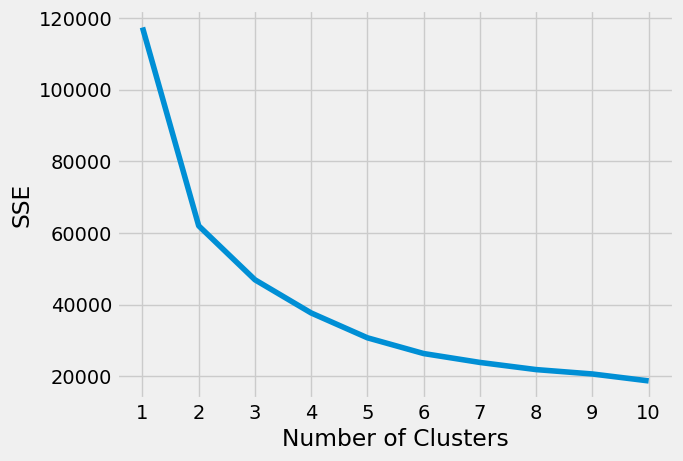

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator( range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

Retraining with the best number of Clusters

In [ ]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(X)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(X)

DBSCAN(eps=0.3)

Evaluating Clustering Performance Using Advanced Techniques

In [ ]:
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

The Silhouette Score measures the average distance between each data point and the points in its own cluster compared to points in other clusters. Higher silhouette scores indicate better-defined and well-separated clusters.

In [ ]:
#Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(X, kmeans.labels_).round(2)

In [ ]:
print("Silhouette Score:", kmeans_silhouette)

Silhouette Score: 0.3


The Calinski-Harabasz Score, also known as the Variance Ratio Criterion, calculates the ratio between the within-cluster dispersion and the between-cluster dispersion. Higher scores indicate better-defined and more separated clusters.

In [ ]:
ch_score = calinski_harabasz_score(X, kmeans.labels_).round(2)
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 110.39


Additionally, you can use the inertia_ attribute of the KMeans object to retrieve the within-cluster sum of squares (WCSS): A lower WCSS indicates better clustering.

In [ ]:
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss)

Within-Cluster Sum of Squares (WCSS): 46903.082734499214


In [ ]:
ari_kmeans = adjusted_rand_score(y, kmeans.labels_)

The *adjusted rand index* **(ARI)** output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

In [ ]:
round(ari_kmeans, 4)

-0.0306

In [ ]:
ari_dbscan = adjusted_rand_score(y, dbscan.labels_)

In [ ]:
round(ari_dbscan, 4)

0.0

In [ ]:
kmeans.predict(X.iloc[:4,:])

array([2, 0, 1, 2], dtype=int32)

Predicting New Users/People

In [ ]:
print('The first person belongs to cluster number {}'.format(kmeans.predict(np.reshape(np.array(X.iloc[0,:]), (-1, len(X.iloc[0,:]))))))

The first person belongs to cluster number [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
print('The second person belongs to cluster number {}'.format(kmeans.predict(np.reshape(np.array(X.iloc[1,:]), (-1, len(X.iloc[0,:]))))))

The second person belongs to cluster number [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
predictions=kmeans.predict(X)

In [ ]:
new_data=X.copy()

In [ ]:
new_data['cluster']=predictions

In [ ]:
new_data.head(10)

,Glucose_Level,Cholestrol,Temp,Weight,BMI,Height,Waist_circumference,HB,Gender_x,Age,...,COVID-19_comorbidities,Symp_Cold_i,Symp_Cough_i,Symp_Sore_throat_i,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i,break_through,cluster
73,4.0,4.0,36.0,102.0,39.0,2.0,110.0,14.0,2.0,40.0,...,0,0,0,0,0,0,0,0,0,2
18,4.0,5.0,36.0,93.0,41.0,2.0,109.0,10.0,2.0,46.0,...,0,0,0,0,0,0,0,0,0,0
118,4.0,8.0,36.0,72.0,28.0,2.0,95.0,14.0,2.0,56.0,...,0,0,0,0,0,0,0,0,0,1
78,6.0,5.0,36.0,118.0,52.0,2.0,111.0,18.0,2.0,55.0,...,0,0,0,0,0,0,0,0,0,2
76,5.0,4.0,37.0,80.0,28.0,2.0,98.0,16.0,1.0,46.0,...,0,0,0,0,0,0,0,0,0,0
31,5.0,5.0,36.0,66.0,26.0,2.0,97.0,13.0,2.0,77.0,...,0,0,0,0,0,0,0,0,0,1
64,5.0,4.0,36.0,67.0,23.0,2.0,82.0,9.0,1.0,43.0,...,0,0,0,0,0,0,0,0,0,1
141,5.0,4.0,36.0,85.0,35.0,2.0,111.0,12.0,2.0,36.0,...,0,0,0,0,0,0,0,0,0,0
68,8.0,6.0,36.0,68.0,29.0,2.0,101.0,16.0,2.0,58.0,...,0,0,0,0,0,0,0,0,0,1
82,4.0,5.0,36.0,71.0,29.0,2.0,94.0,17.0,2.0,54.0,...,0,0,0,0,0,0,0,0,0,1


Visualising the 4 clusters

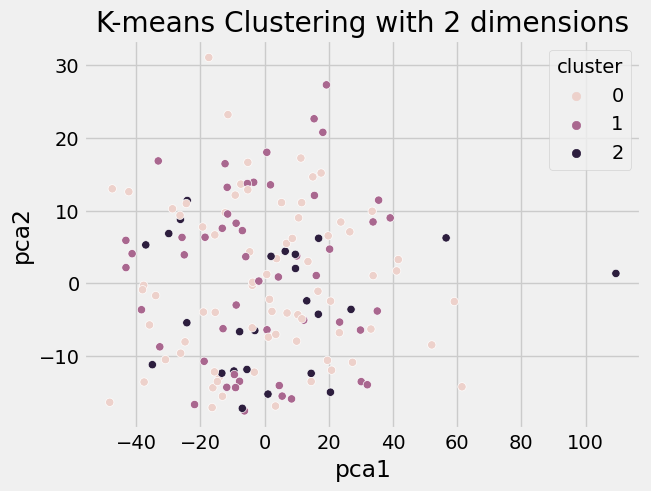

In [ ]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

from sklearn.decomposition import PCA
import seaborn as sns
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=new_data['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

Clusters from the most Critical Variables

In [ ]:
X.columns

Index(['Glucose_Level', 'Cholestrol', 'Temp', 'Weight', 'BMI', 'Height',
       'Waist_circumference', 'HB', 'Gender_x', 'Age', 'HLE', 'Smoking',
       'Physical_activity', 'PA/week', 'PA level', 'HPT',
       'Low/high_Blood_sugar', 'Fam_hx_CVD', 'High_Chol', 'Kidney_problems',
       'Liver_problems', 'Vaccine_Type', 'Vaccination_Status',
       'Number_of_Doses', 'Side_Effects', 'Boosting_Status',
       'Symptoms_and_Treatment', 'Hospitalization', 'Co-Morbidities',
       'BP_Average', 'Weight_Category', 'Occupation', 'Marital_status',
       'Hazardous exposure', 'Alcohol', 'Symp_Cold', 'Symp_Cough',
       'Symp_Sore_throat', 'Symp_Headache', 'breathlessness', 'taste_Smell',
       'Close_to_Someonewith_Covid', 'COVID-19_comorbidities', 'Symp_Cold_i',
       'Symp_Cough_i', 'Symp_Sore_throat_i', 'Symp_Headache_i',
       'breathlessness_i', 'taste_Smell_i', 'Close_to_Someonewith_Covid_i',
       'break_through'],
      dtype='object')

In [ ]:
X_critical=X[['Temp','Cholestrol','Glucose_Level','BP_Average','Waist_circumference','Weight',
              'BMI','HB','PA/week','Boosting_Status','Vaccination_Status','Vaccine_Type']].copy()

In [ ]:
kmeans_2 = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans_2.fit(X_critical)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
dbscan_2 = DBSCAN(eps=0.3)
dbscan_2.fit(X_critical)

DBSCAN(eps=0.3)

In [ ]:
ari_kmeans = adjusted_rand_score(y, kmeans_2.labels_)

In [ ]:
round(ari_kmeans, 4)

-0.0223

In [ ]:
ari_dbscan = adjusted_rand_score(y, dbscan_2.labels_)

In [ ]:
round(ari_dbscan, 4)

0.0

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
# from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
model = AgglomerativeClustering(n_clusters = 3)
# fit model and predict clusters
yhat = model.fit_predict(X_critical)
# retrieve unique clusters
clusters = unique(yhat)


In [ ]:
agglomerative=X_critical.copy()

In [ ]:
agglomerative['clustering']=yhat

In [ ]:
X_critical.head()

,Temp,Cholestrol,Glucose_Level,BP_Average,Waist_circumference,Weight,BMI,HB,PA/week,Boosting_Status,Vaccination_Status,Vaccine_Type
73,36.0,4.0,4.0,0,110.0,102.0,39.0,14.0,1.0,1,1,1
18,36.0,5.0,4.0,3,109.0,93.0,41.0,10.0,2.0,1,1,0
118,36.0,8.0,4.0,0,95.0,72.0,28.0,14.0,2.0,1,1,1
78,36.0,5.0,6.0,0,111.0,118.0,52.0,18.0,1.0,2,1,1
76,37.0,4.0,5.0,0,98.0,80.0,28.0,16.0,2.0,1,1,1


In [ ]:

# birch clustering
from sklearn.cluster import Birch
# define dataset
# define the model
model = Birch(threshold=0.01, n_clusters=3)
# fit the model
model.fit(X_critical)
# assign a cluster to each example
yhat = model.predict(X_critical)
# retrieve unique clusters
clusters = unique(yhat)
BIRCH=X_critical.copy()

In [ ]:
BIRCH['Cluster']=yhat

In [ ]:
BIRCH.head()

,Temp,Cholestrol,Glucose_Level,BP_Average,Waist_circumference,Weight,BMI,HB,PA/week,Boosting_Status,Vaccination_Status,Vaccine_Type,Cluster
73,36.0,4.0,4.0,0,110.0,102.0,39.0,14.0,1.0,1,1,1,2
18,36.0,5.0,4.0,3,109.0,93.0,41.0,10.0,2.0,1,1,0,2
118,36.0,8.0,4.0,0,95.0,72.0,28.0,14.0,2.0,1,1,1,0
78,36.0,5.0,6.0,0,111.0,118.0,52.0,18.0,1.0,2,1,1,1
76,37.0,4.0,5.0,0,98.0,80.0,28.0,16.0,2.0,1,1,1,0


Using T-SNE to visualise Data

In [ ]:
# plotX = pd.DataFrame(np.array(BIRCH.sample(14)))
plotX = pd.DataFrame(np.array(BIRCH))

plotX.columns = BIRCH.columns

In [ ]:
#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
#Set our perplexity
perplexity = 2
#T-SNE with one dimension
tsne_1d = TSNE(n_components=1, perplexity=perplexity)

#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

#T-SNE with three dimensions
tsne_3d = TSNE(n_components=3, perplexity=perplexity)

In [ ]:
#This DataFrame holds a single dimension,built by T-SNE
TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three dimensions, built by T-SNE
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [ ]:
TCs_1d.columns = ["TC1_1d"]


#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [ ]:
plotX = pd.concat([plotX,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')
plotX["dummy"] = 0


In [ ]:
BIRCH['Cluster'].value_counts()

0    73
2    60
1    17
Name: Cluster, dtype: int64

In [ ]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]


In [ ]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
#trace4 is for 'Cluster 3'

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)



data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["TC1_3d"],
                    y = cluster0["TC2_3d"],
                    z = cluster0["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["TC1_3d"],
                    y = cluster1["TC2_3d"],
                    z = cluster1["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["TC1_3d"],
                    y = cluster2["TC2_3d"],
                    z = cluster2["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)


data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

Performing multiple logistic regression analsysis using the statsmodels library in Python

In [ ]:
y=pd.DataFrame(y, columns=['BKI'])

Finding Feature Importances using Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming you have a dataset with independent variables in a DataFrame called 'df'
# and the dependent variable in a Series called 'y'

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importance values
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the importance of each feature
print(importance_df)

<ipython-input-190-2d4f2cbac077>:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



                         Feature  Importance
50                 break_through         1.0
38                 Symp_Headache         0.0
28                Co-Morbidities         0.0
29                    BP_Average         0.0
30               Weight_Category         0.0
31                    Occupation         0.0
32                Marital_status         0.0
33            Hazardous exposure         0.0
34                       Alcohol         0.0
35                     Symp_Cold         0.0
36                    Symp_Cough         0.0
37              Symp_Sore_throat         0.0
39                breathlessness         0.0
26        Symptoms_and_Treatment         0.0
40                   taste_Smell         0.0
41    Close_to_Someonewith_Covid         0.0
42        COVID-19_comorbidities         0.0
43                   Symp_Cold_i         0.0
44                  Symp_Cough_i         0.0
45            Symp_Sore_throat_i         0.0
46               Symp_Headache_i         0.0
47        

multiple scatter plots to visualize different combinations of independent variables

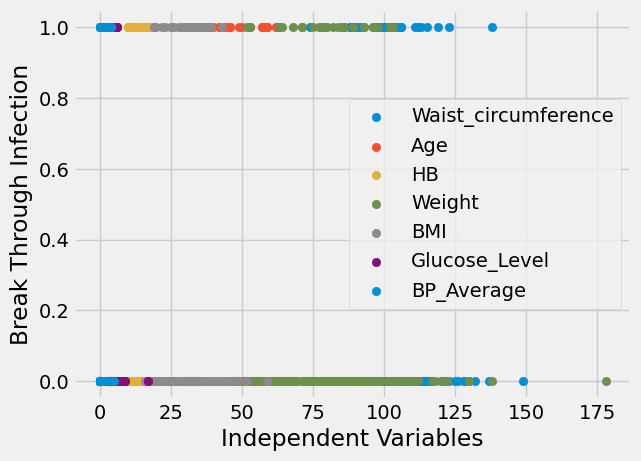

In [ ]:
# Plot scatter plots for each combination of independent variables and the dependent variable
for col in ['Waist_circumference','Age', 'HB','Weight','BMI','Glucose_Level','BP_Average']:
    plt.scatter(X[col], y, label=col)

plt.xlabel('Independent Variables')
plt.ylabel('Break Through Infection')
plt.legend()
plt.show()

A pair plot is useful when you have multiple independent variables. It creates scatter plots between all pairs of independent variables and the dependent variable

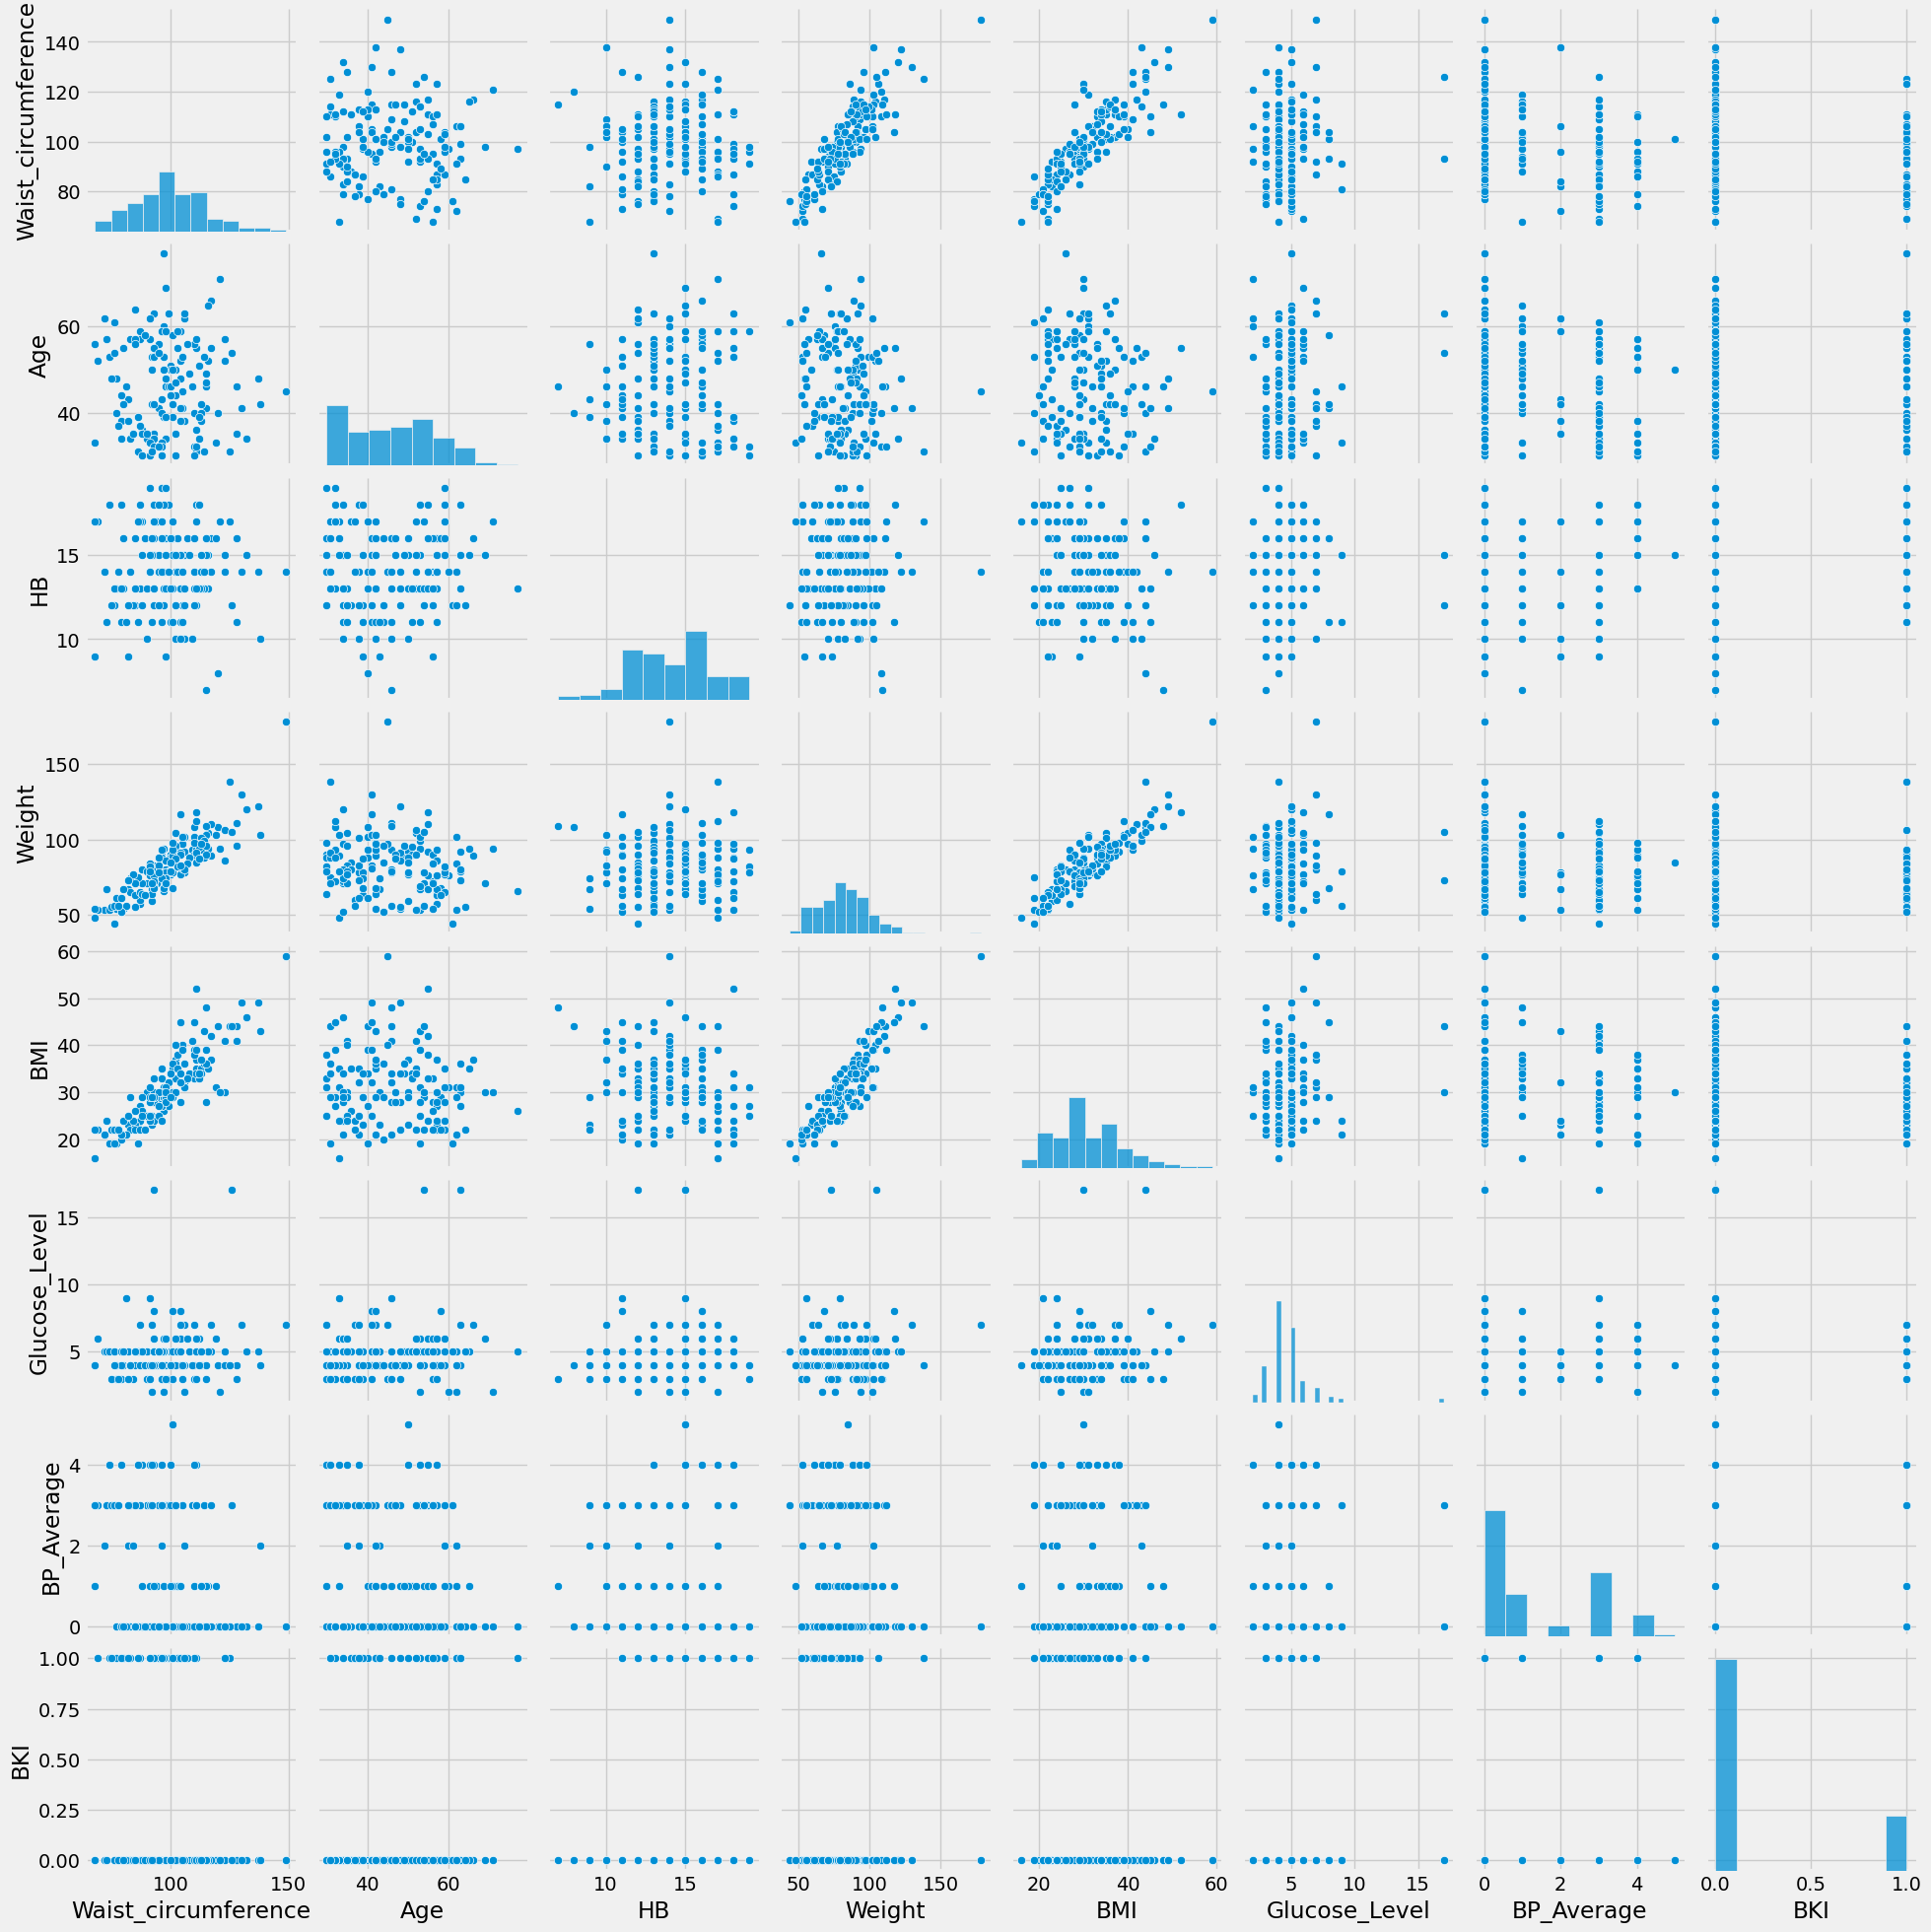

In [ ]:

# Combine the independent variables and the dependent variable into a single DataFrame
data = pd.concat([X[['Waist_circumference','Age','HB','Weight','BMI','Glucose_Level','BP_Average']], y], axis=1)

# Plot pair plots
sns.pairplot(data)
plt.show()

A parallel coordinates plot displays multiple independent variables as vertical axes and the dependent variable as a line that connects the values for each data point. This plot allows you to compare the patterns and ranges of the independent variables with the dependent variable

In [ ]:
y.value_counts()

BKI
0      119
1       31
dtype: int64

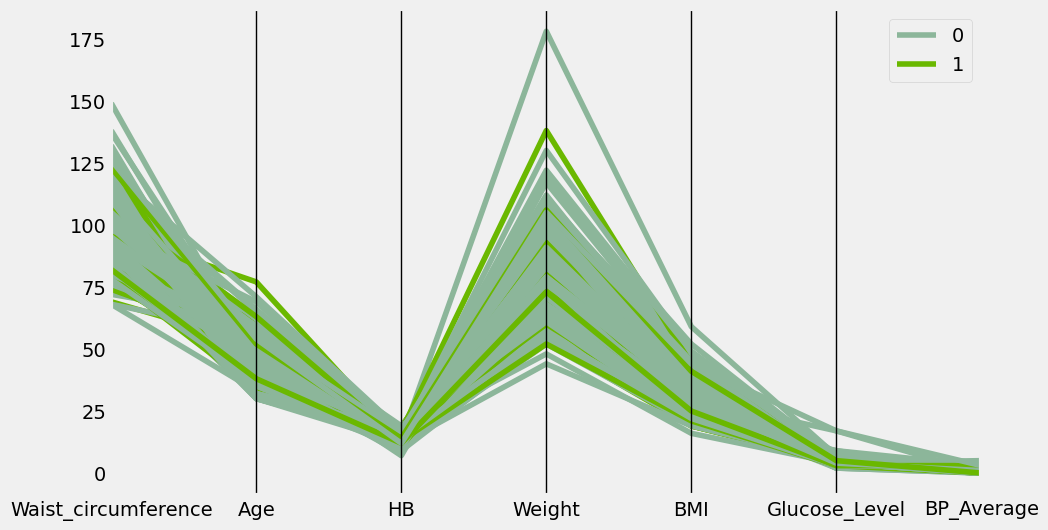

In [ ]:
data = pd.concat([X[['Waist_circumference','Age', 'HB','Weight','BMI','Glucose_Level','BP_Average']], y], axis=1)

# Plot parallel coordinates plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(data, 'BKI')
plt.show()

Explain cluster results with SHAP values

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
y=kmeans.labels_
y = label_binarize(y, classes=[0,1,2])
clf=RandomForestClassifier()
clf.fit(X,y)

RandomForestClassifier()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 14.8 MB/s eta 0:00:00


In [ ]:
import shap
explainer= shap.TreeExplainer(clf)
shap_values = explainer(X)
# explainer = shap.TreeExplainer(loadedmodel,Xtrain)
# shap_values = explainer(Xtest)


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


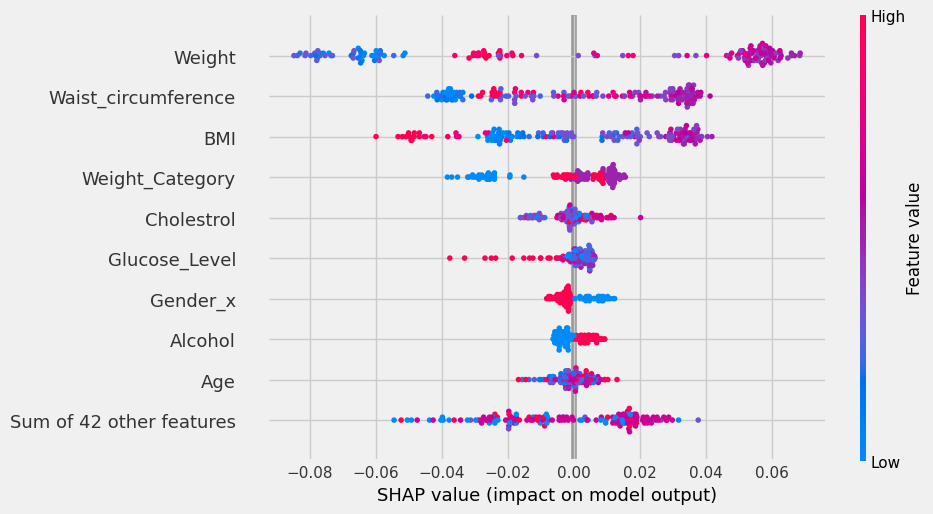

In [ ]:
shap.plots.beeswarm(shap_values[:,:,1])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


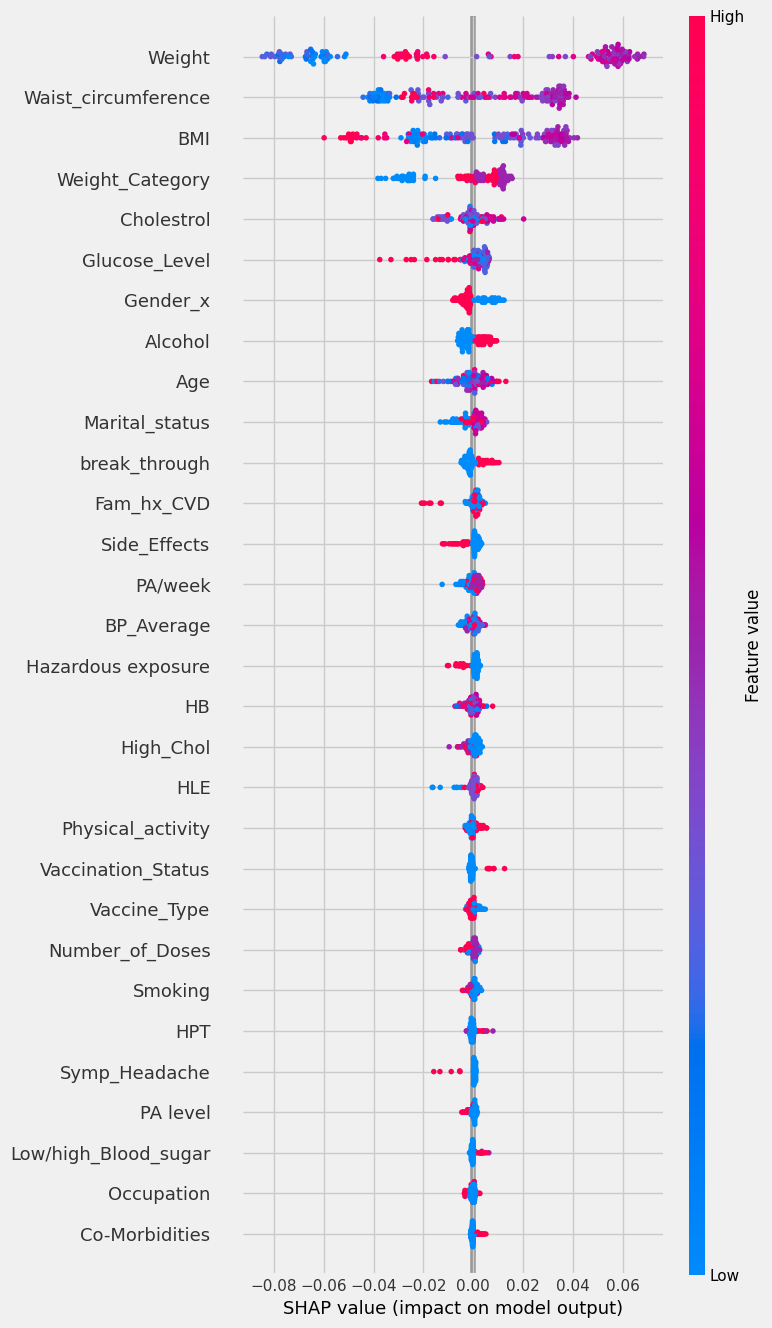

In [ ]:
shap.summary_plot(shap_values[:,:,1], max_display=30)


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0].base_values, plot_cmap="DrDb")

Explainability using Classix

In [ ]:
# install library
!pip install ClassixClustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.6/629.6 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ClassixClustering: filename=classixclustering-0.7.7-cp310-cp310-linux_x86_64.whl size=1248883 sha256=ce2cbe265af9c69093a0562d0a898d5cfbbc7a15b0fa9b442c0d172f1b556310
  Stored in directory: /root/.cache/pip/wheels/de/2e/6f/b953929cb80d21209e4f40bb0738be2238b8a84d2efba47ad0
Successfully built ClassixClustering


In [ ]:
import matplotlib.pyplot as plt
from classix import CLASSIX

In [ ]:
# initailize the clustering
clx = CLASSIX(radius=0.70, minPts=3,  group_merging='density')
# fitting the data
clx.fit(X)

CLASSIX(sorting='pca', radius=0.7, minPts=3, group_merging='density')
The 150 data points were aggregated into 35 groups.
In total 544 comparisons were required (3.63 comparisons per data point). 
The 35 groups were merged into 35 clusters with the following sizes: 
      * cluster 0 : 14
      * cluster 1 : 13
      * cluster 2 : 12
      * cluster 3 : 11
      * cluster 4 : 10
      * cluster 5 : 7
      * cluster 6 : 7
      * cluster 7 : 7
      * cluster 8 : 6
      * cluster 9 : 6
      * cluster 10 : 5
      * cluster 11 : 5
      * cluster 12 : 5
      * cluster 13 : 4
      * cluster 14 : 3
      * cluster 15 : 3
      * cluster 16 : 3
      * cluster 17 : 3
      * cluster 18 : 3
      * cluster 19 : 3
      * cluster 20 : 2
      * cluster 21 : 2
      * cluster 22 : 2
      * cluster 23 : 2
      * cluster 24 : 2
      * cluster 25 : 1
      * cluster 26 : 1
      * cluster 27 : 1
      * cluster 28 : 1
      * cluster 29 : 1
      * cluster 30 : 1
      * cluster 31 : 1
  

CLASSIX(sorting='pca', radius=0.7, minPts=3, group_merging='density')

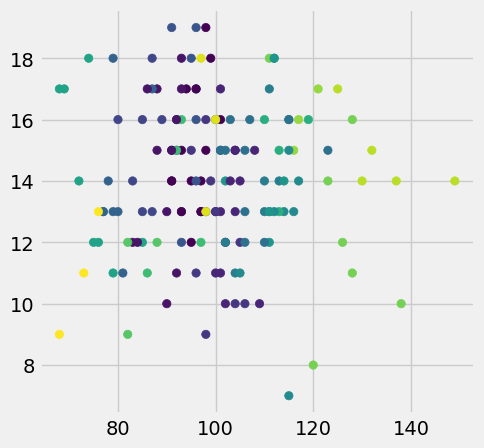

In [ ]:
# visualize the clusters
plt.figure(figsize=(5,5))
plt.scatter(data.values[:,0], data.values[:,2], c=clx.labels_)
plt.show()

In [ ]:
# explaining the clusters
clx.explain()

A clustering of 150 data points with 51 features has been performed. 
The radius parameter was set to 0.70 and MinPts was set to 3. 
As the provided data has been scaled by a factor of 1/21.07,
data points within a radius of R=0.70*21.07=14.75 were aggregated into groups. 
In total 544 comparisons were required (3.63 comparisons per data point). 
This resulted in 35 groups, each uniquely associated with a starting point. 
These 35 groups were subsequently merged into 20 clusters. 
A list of all starting points is shown below.
----------------------------------------
 Group  NrPts  Cluster            Coordinates           
   0      1      17       0.11 -0.07 -0.01 4.52 1.33 ...
   1      1      17      -0.03 -0.07 -0.01 2.62 0.61 ...
   2      3      17       0.11 -0.02 -0.01 2.24 0.85 ...
   3      3      15      -0.03 -0.02 -0.01 1.34 0.61 ...
   4      2      15      -0.03 -0.02 -0.01 0.96 0.57 ...
   5      1      15       0.06 -0.02 -0.01 1.67 0.99 ...
   6      1      15        0

The group radius in the visualization might not be accurate.


Interpretable K-Means: Clusters Feature Importances

Unsupervised -> Supervised

In [ ]:
features = X.columns.tolist()
print(f"Features: \n{features}")

centroids = kmeans.cluster_centers_
print(f"Centroids \n{centroids}")


Features: 
['Glucose_Level', 'Cholestrol', 'Temp', 'Weight', 'BMI', 'Height', 'Waist_circumference', 'HB', 'Gender_x', 'Age', 'HLE', 'Smoking', 'Physical_activity', 'PA/week', 'PA level', 'HPT', 'Low/high_Blood_sugar', 'Fam_hx_CVD', 'High_Chol', 'Kidney_problems', 'Liver_problems', 'Vaccine_Type', 'Vaccination_Status', 'Number_of_Doses', 'Side_Effects', 'Boosting_Status', 'Symptoms_and_Treatment', 'Hospitalization', 'Co-Morbidities', 'BP_Average', 'Weight_Category', 'Occupation', 'Marital_status', 'Hazardous exposure', 'Alcohol', 'Symp_Cold', 'Symp_Cough', 'Symp_Sore_throat', 'Symp_Headache', 'breathlessness', 'taste_Smell', 'Close_to_Someonewith_Covid', 'COVID-19_comorbidities', 'Symp_Cold_i', 'Symp_Cough_i', 'Symp_Sore_throat_i', 'Symp_Headache_i', 'breathlessness_i', 'taste_Smell_i', 'Close_to_Someonewith_Covid_i', 'break_through']
Centroids 
[[ 4.45945946e+00  5.40540541e+00  3.61216216e+01  8.62702703e+01
   3.16756757e+01  2.00000000e+00  1.02486486e+02  1.42162162e+01
   1.66216

In [ ]:
sorted_centroid_features_idx = centroids.argsort(axis=1)[:,::-1]
print(f"Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: \n{sorted_centroid_features_idx}")

print()

sorted_centroid_features_values = np.take_along_axis(centroids, sorted_centroid_features_idx, axis=1)
print(f"Sorted Feature/Dimension Values for Each Centroid in Descending Order: \n{sorted_centroid_features_values}")

Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: 
[[ 6  3  9  2  4  7  1  0 10  5 13 23 32  8 17 11 12 18 25 30 15 29 14 16
  22 19 35 20 21 34 28 50 31 26 24 33 27 46 47 41 36 39 40 42 43 38 44 37
  49 45 48]
 [ 6  3  9  2  4  7  1  0 10 23  5 13 17  8 11 29 32 18 14 25 12 16 15 19
  20 22 35 30 21 34 24 50 31 33 28 26 27 46 38 43 36 41 44 47 39 40 42 49
  37 45 48]
 [ 6  3  4  9  2  7  0  1 10  5 23  8 13 17 11 12 18 32 25 14 16 15 19 30
  35 22 20 29 21 24 33 31 34 26 50 28 38 44 27 46 36 41 47 39 42 40 37 49
  45 48 43]]

Sorted Feature/Dimension Values for Each Centroid in Descending Order: 
[[ 1.02486486e+02  8.62702703e+01  4.64594595e+01  3.61216216e+01
   3.16756757e+01  1.42162162e+01  5.40540541e+00  4.45945946e+00
   2.36486486e+00  2.00000000e+00  1.93243243e+00  1.93243243e+00
   1.70270270e+00  1.66216216e+00  1.59459459e+00  1.59459459e+00
   1.33783784e+00  1.29729730e+00  1.28378378e+00  1.25675676e+00
   1.22972973e+00  1.22972973e+00  1.202702

In [ ]:
first_features_in_centroid_1 = centroids[0][sorted_centroid_features_idx[0]]
print(list(
        zip(
            [features[feature] for feature in sorted_centroid_features_idx[0]],
            first_features_in_centroid_1
        )
    ))

[('Waist_circumference', 102.48648648648648), ('Weight', 86.27027027027027), ('Age', 46.45945945945946), ('Temp', 36.12162162162162), ('BMI', 31.675675675675677), ('HB', 14.216216216216216), ('Cholestrol', 5.405405405405405), ('Glucose_Level', 4.459459459459459), ('HLE', 2.364864864864865), ('Height', 2.0), ('PA/week', 1.9324324324324322), ('Number_of_Doses', 1.9324324324324322), ('Marital_status', 1.7027027027027026), ('Gender_x', 1.662162162162162), ('Fam_hx_CVD', 1.5945945945945947), ('Smoking', 1.5945945945945945), ('Physical_activity', 1.337837837837838), ('High_Chol', 1.2972972972972974), ('Boosting_Status', 1.2837837837837838), ('Weight_Category', 1.2567567567567568), ('HPT', 1.2297297297297296), ('BP_Average', 1.2297297297297296), ('PA level', 1.2027027027027026), ('Low/high_Blood_sugar', 1.2027027027027026), ('Vaccination_Status', 1.0675675675675675), ('Kidney_problems', 1.027027027027027), ('Symp_Cold', 1.0135135135135136), ('Liver_problems', 1.0), ('Vaccine_Type', 0.71621621

In [ ]:
# Train a classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X, kmeans.labels_)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(np.array(X.iloc[:,:].columns.tolist()), sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(np.array(clf.feature_importances_), sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

[('Weight', 0.34219706936841493),
 ('Waist_circumference', 0.15627746461961045),
 ('BMI', 0.1526707716600885),
 ('Weight_Category', 0.0648304418535168),
 ('Age', 0.03417784563859787),
 ('HB', 0.022281886388763716),
 ('Glucose_Level', 0.02103798533967258),
 ('Cholestrol', 0.0202327717875131),
 ('Marital_status', 0.016091398935422118),
 ('Gender_x', 0.012859049439436748),
 ('BP_Average', 0.011480840723203002),
 ('Number_of_Doses', 0.011004597153314427),
 ('Fam_hx_CVD', 0.010164365826393715),
 ('PA/week', 0.009648434757891618),
 ('Smoking', 0.00929323544625813),
 ('HLE', 0.008740556046163328),
 ('Alcohol', 0.008342443483340766),
 ('Side_Effects', 0.008291479234096654),
 ('Physical_activity', 0.00809595269552091),
 ('Hazardous exposure', 0.0072449035140259),
 ('High_Chol', 0.0071664652479135945),
 ('break_through', 0.005962326021909768),
 ('Temp', 0.00552380675569825),
 ('Co-Morbidities', 0.0052117559394016895),
 ('Vaccine_Type', 0.005018506276151991),
 ('Low/high_Blood_sugar', 0.004164620

In [ ]:
Xtended=X.copy()
Xtended['Cluster']=kmeans.labels_

Text(0, 0.5, 'Counts')

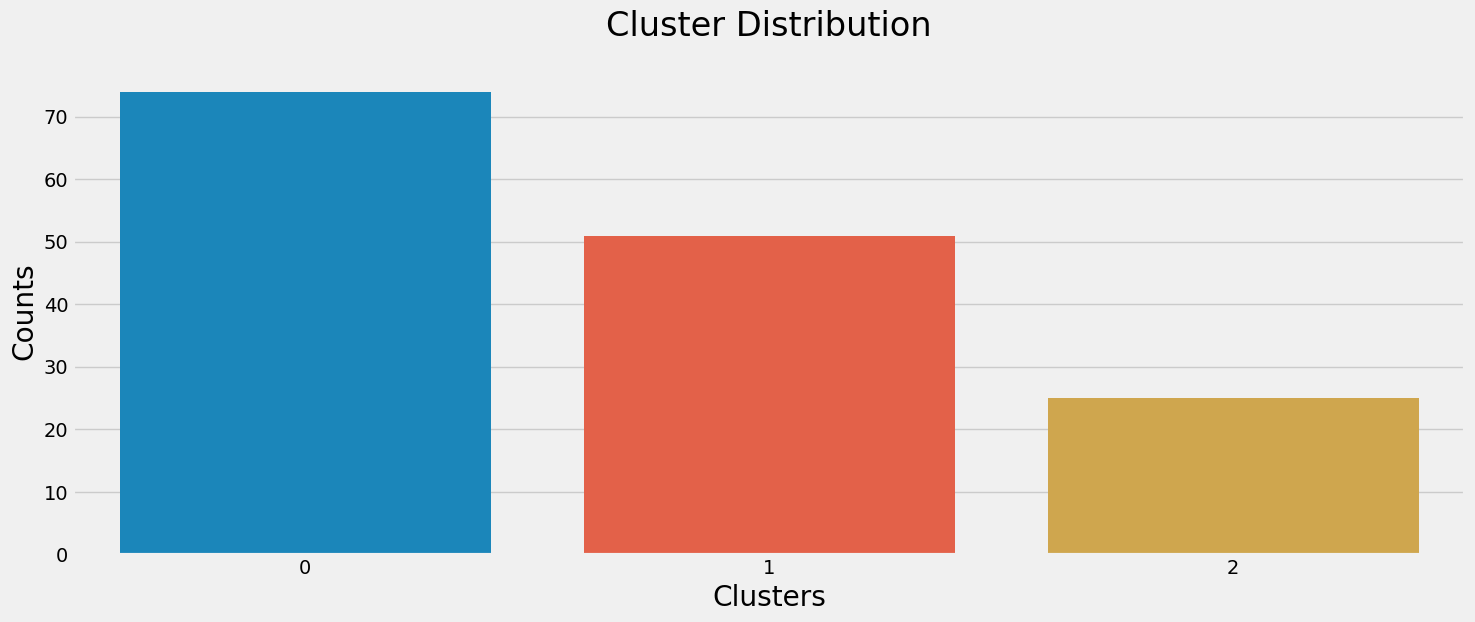

In [ ]:
categories =np.unique(kmeans.labels_).tolist()
category_distrib = Xtended['Cluster'].value_counts()

plt.figure(figsize=(16, 6))
ax = sns.barplot(x=category_distrib.index, y=category_distrib.values)
ax.set_title("Cluster Distribution", fontsize="xx-large", y=1.05)
ax.set_xlabel("Clusters", fontsize="x-large")
ax.set_ylabel("Counts", fontsize="x-large")

In [ ]:
cluster_0=Xtended[Xtended['Cluster']==0]
cluster_1=Xtended[Xtended['Cluster']==1]
cluster_2=Xtended[Xtended['Cluster']==2]


## Size of each Cluster

In [ ]:
print("Cluster 0 has {} profiles, cluster 1 has {} profiles and cluster 2 has {} profiles".format(len(cluster_0),len(cluster_1), len(cluster_2)))

Cluster 0 has 74 profiles, cluster 1 has 51 profiles and cluster 2 has 25 profiles


## **Cluster 0**

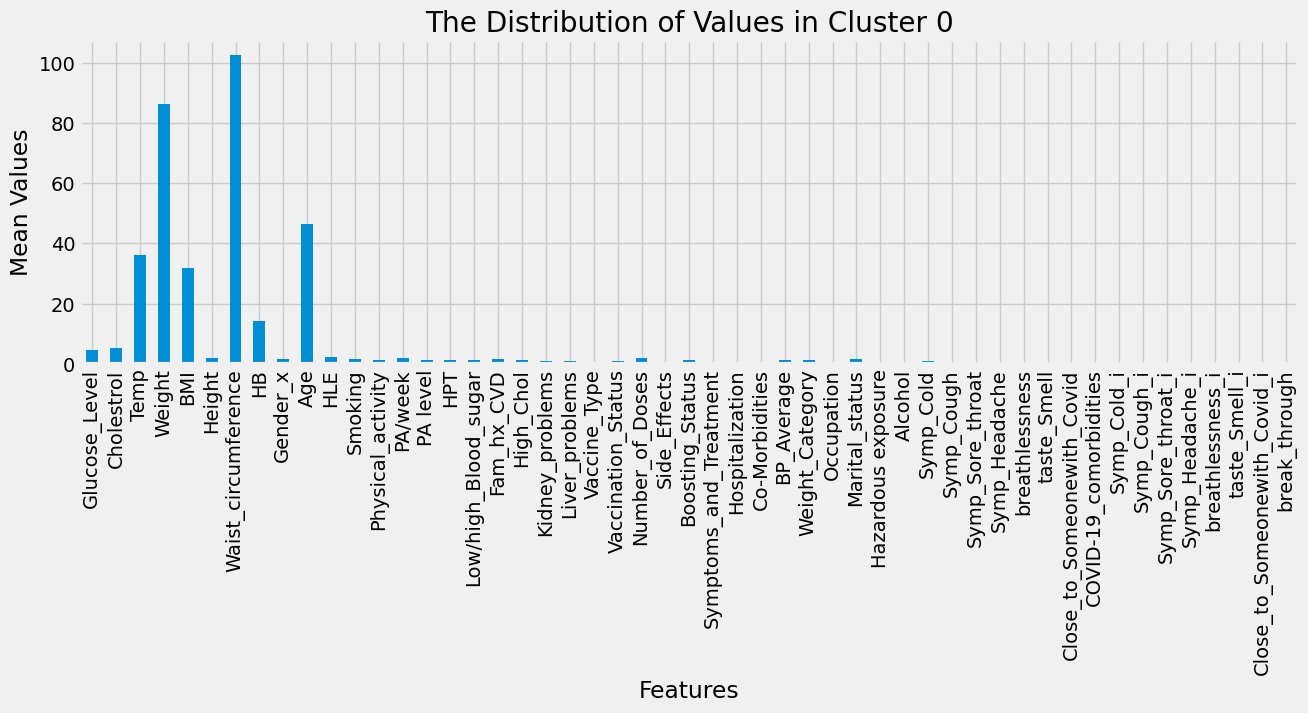

In [ ]:
# Plot the bar graph
mean_values = cluster_0.iloc[:,:-1].mean()
mean_values.plot(kind='bar')
plt.gcf().set_size_inches(14, 4)
# Add labels and title
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.title('The Distribution of Values in Cluster 0')

# Display the plot
plt.show()

## **Cluster 1**

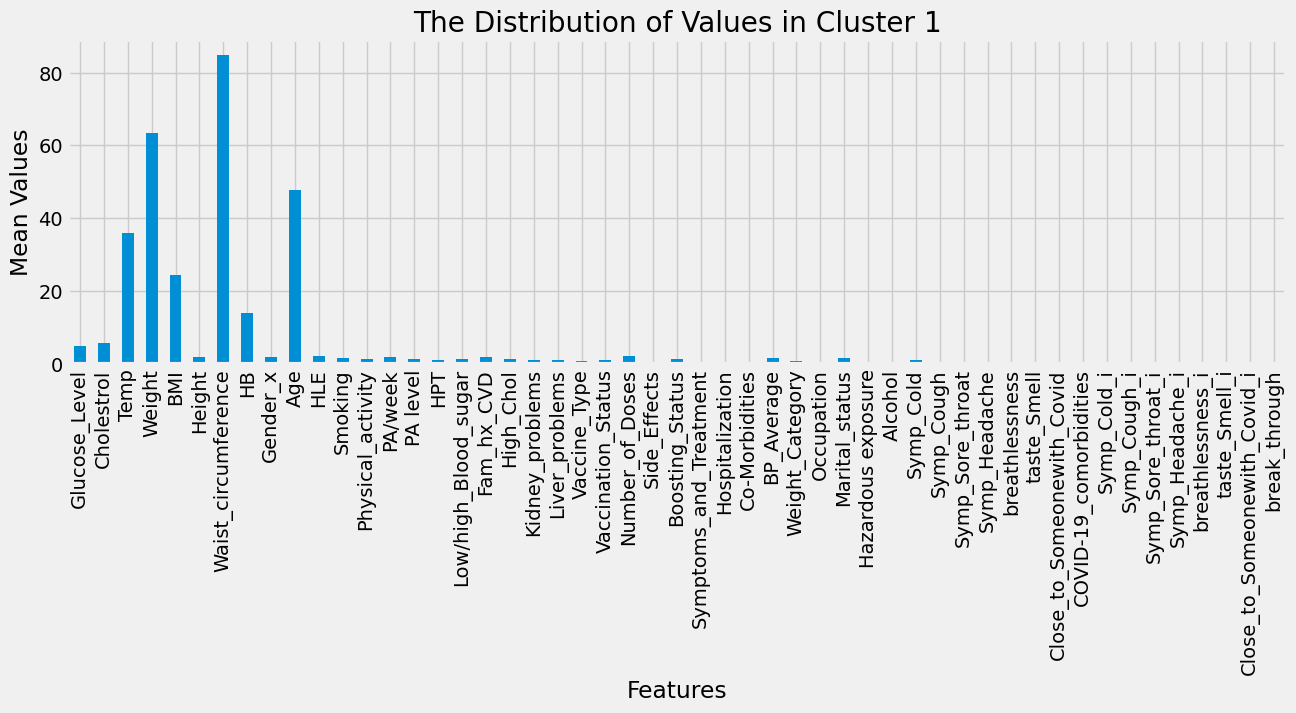

In [ ]:
# Plot the bar graph
mean_values = cluster_1.iloc[:,:-1].mean()
mean_values.plot(kind='bar')
plt.gcf().set_size_inches(14, 4)
# Add labels and title
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.title('The Distribution of Values in Cluster 1')

# Display the plot
plt.show()

## **Cluster 2**

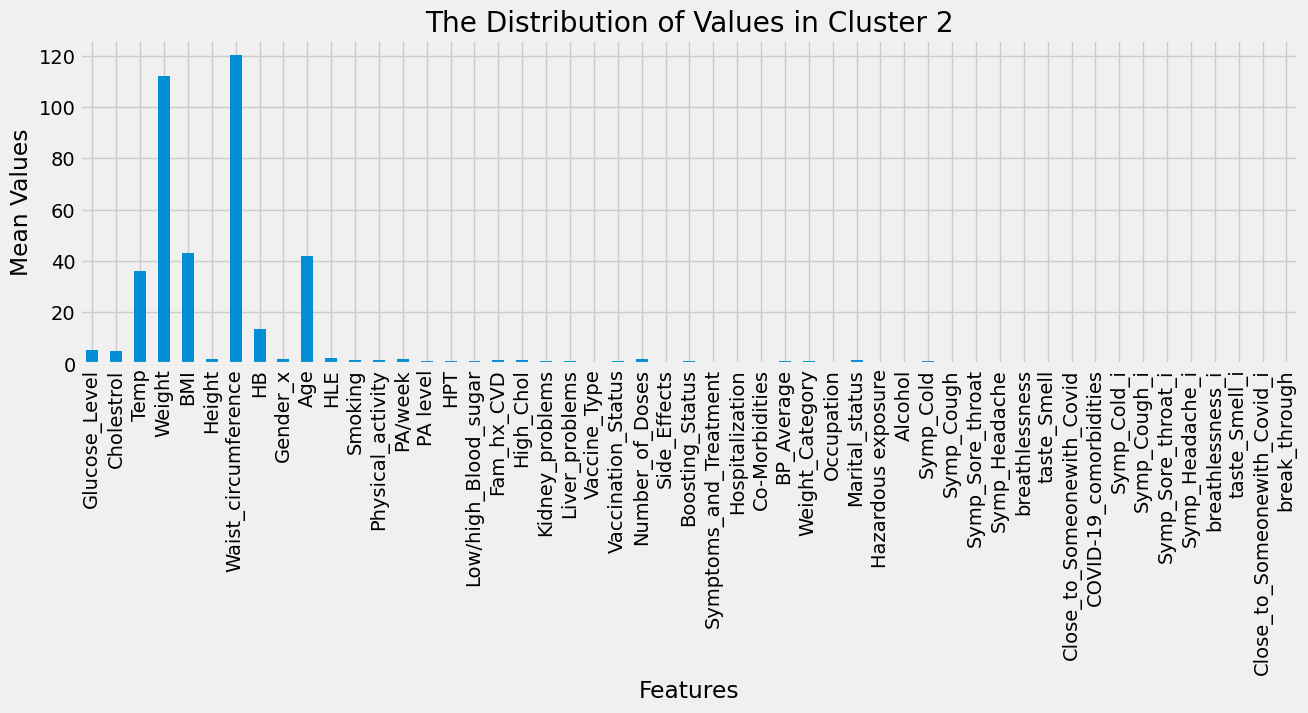

In [ ]:
# Plot the bar graph
mean_values = cluster_2.iloc[:,:-1].mean()
mean_values.plot(kind='bar')
plt.gcf().set_size_inches(14, 4)
# Add labels and title
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.title('The Distribution of Values in Cluster 2')

# Display the plot
plt.show()

Most Important Features in all Clusters

Text(0, 0.5, 'feature importance weight')

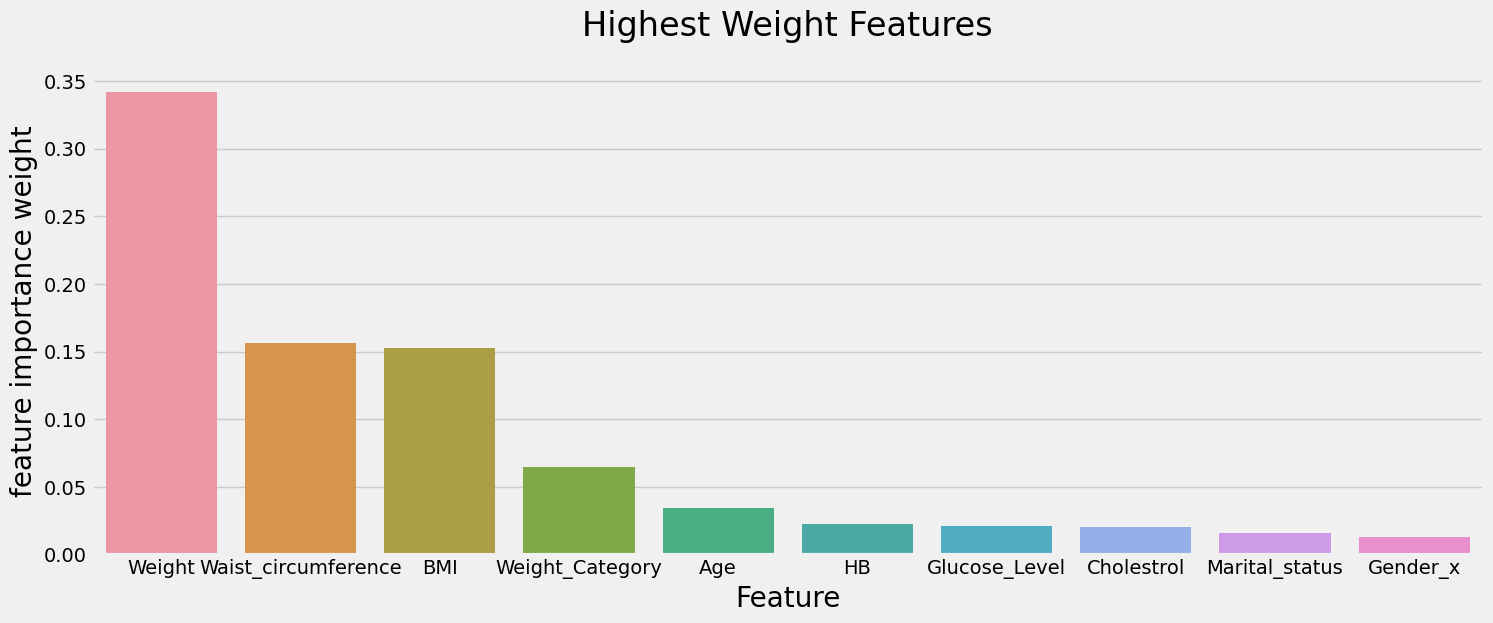

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=most_important_features[:10], y=most_important_weights[:10])
ax.set_title("Highest Weight Features", fontsize="xx-large", y=1.05)
ax.set_xlabel("Feature", fontsize="x-large")
ax.set_ylabel("feature importance weight", fontsize="x-large")

Most Important Features in Cluster 0





In [ ]:

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features_0 = np.take_along_axis(np.array(cluster_0.iloc[:,:-1].columns.tolist()), sorted_feature_weight_idxes, axis=0)
most_important_weights_0 = np.take_along_axis(np.array(clf.feature_importances_), sorted_feature_weight_idxes, axis=0)

# Show
# list(zip(most_important_features_0, most_important_weights_0))

Text(0, 0.5, 'feature importance weight')

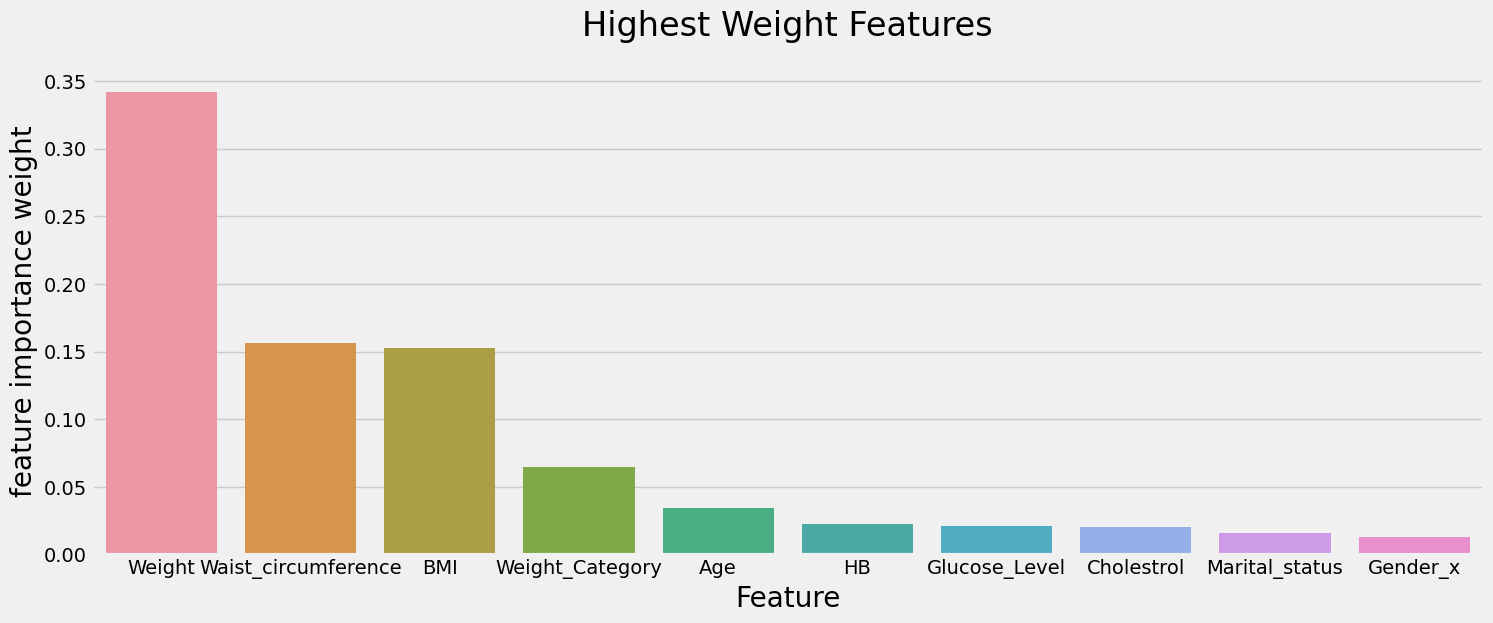

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=most_important_features_0[:10], y=most_important_weights_0[:10])
ax.set_title("Highest Weight Features", fontsize="xx-large", y=1.05)
ax.set_xlabel("Feature", fontsize="x-large")
ax.set_ylabel("feature importance weight", fontsize="x-large")

<!-- Comprehensive Visualization -->

# Comprehensive Visualization

Numerical Values

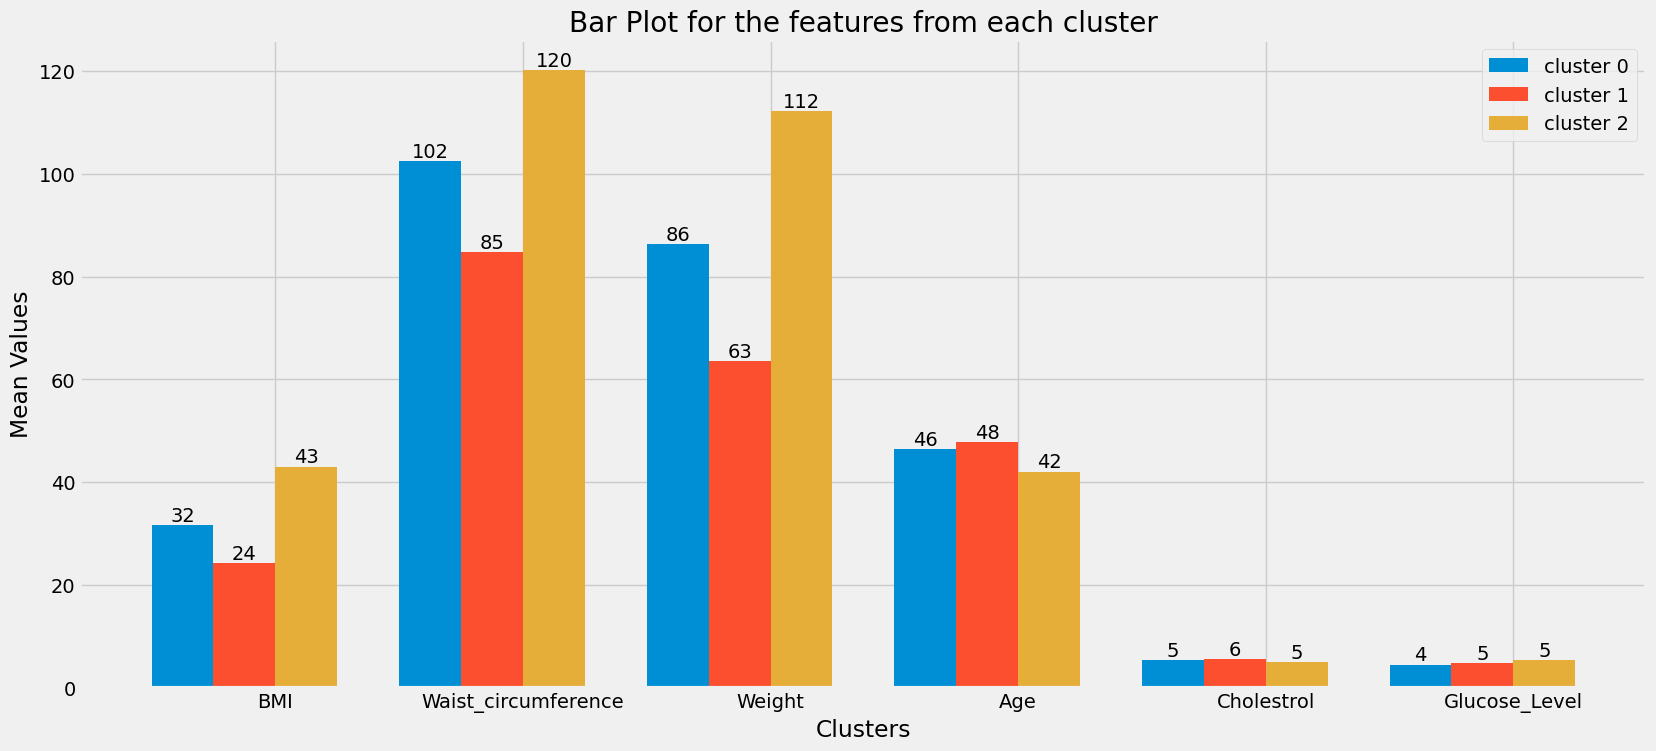

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['BMI', 'Waist_circumference', 'Weight', 'Age', 'Cholestrol', 'Glucose_Level']
cluster_0_values = [round(cluster_0[i].mean(), 3) for i in categories]
cluster_1_values = [round(cluster_1[i].mean(), 3) for i in categories]
cluster_2_values = [round(cluster_2[i].mean(), 3) for i in categories]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(18, 8))

# Set the width of each bar
bar_width = 0.25

# Set the positions of the bars on the x-axis
positions_A = np.arange(len(categories))
positions_B = positions_A + bar_width
positions_C = positions_B + bar_width

# Create the bar plots
ax.bar(positions_A, cluster_0_values, width=bar_width, label='cluster 0')
for i, value in enumerate(cluster_0_values):
    plt.text(i, value, str(int(np.round(value))), ha='center', va='bottom')

ax.bar(positions_B, cluster_1_values, width=bar_width, label='cluster 1')
for i, value in enumerate(cluster_1_values):
    plt.text(i + bar_width, value, str(int(np.round(value))), ha='center', va='bottom')

ax.bar(positions_C, cluster_2_values, width=bar_width, label='cluster 2')
for i, value in enumerate(cluster_2_values):
    plt.text(i + 2 * bar_width, value, str(int(np.round(value))), ha='center', va='bottom')

# Set the axis labels and title
ax.set_xlabel('Clusters')
ax.set_ylabel('Mean Values')
ax.set_title('Bar Plot for the features from each cluster')

# Set the x-axis tick positions and labels
tick_positions = positions_B + bar_width / 2  # Add half of the bar width for centering
ax.set_xticks(tick_positions)
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Display the plot
plt.show()

Categorical Data

In [ ]:
clusters = [cluster_0, cluster_1, cluster_2]


In [ ]:
def bundled(s):
  BP=[]
  vaccine=[]
  doses=[]
  alcohol=[]
  gender=[]
  features=['BP_Average','Vaccination_Status','Number_of_Doses','Alcohol','Gender_x']
  names = ['Cluster 0', 'Cluster 1', 'Cluster 2']
  for j in s:
    BP.append(j['BP_Average'].value_counts().to_dict())
    vaccine.append(j['Vaccination_Status'].value_counts().to_dict())
    doses.append(j['Number_of_Doses'].value_counts().to_dict())
    alcohol.append(j['Alcohol'].value_counts().to_dict())
    gender.append(j['Gender_x'].value_counts().to_dict())
  BP_dict={k: v for k, v in zip(names, BP)}
  vaccine_dict={k: v for k, v in zip(names, vaccine)}
  doses_dict={k: v for k, v in zip(names, doses)}
  alcohol_dict={k: v for k, v in zip(names, alcohol)}
  gender_dict={k: v for k, v in zip(names, gender)}
  all=[BP_dict,vaccine_dict,doses_dict,alcohol_dict,gender_dict]
  return {k: v for k, v in zip(features, all)}


In [ ]:
data=bundled(clusters)

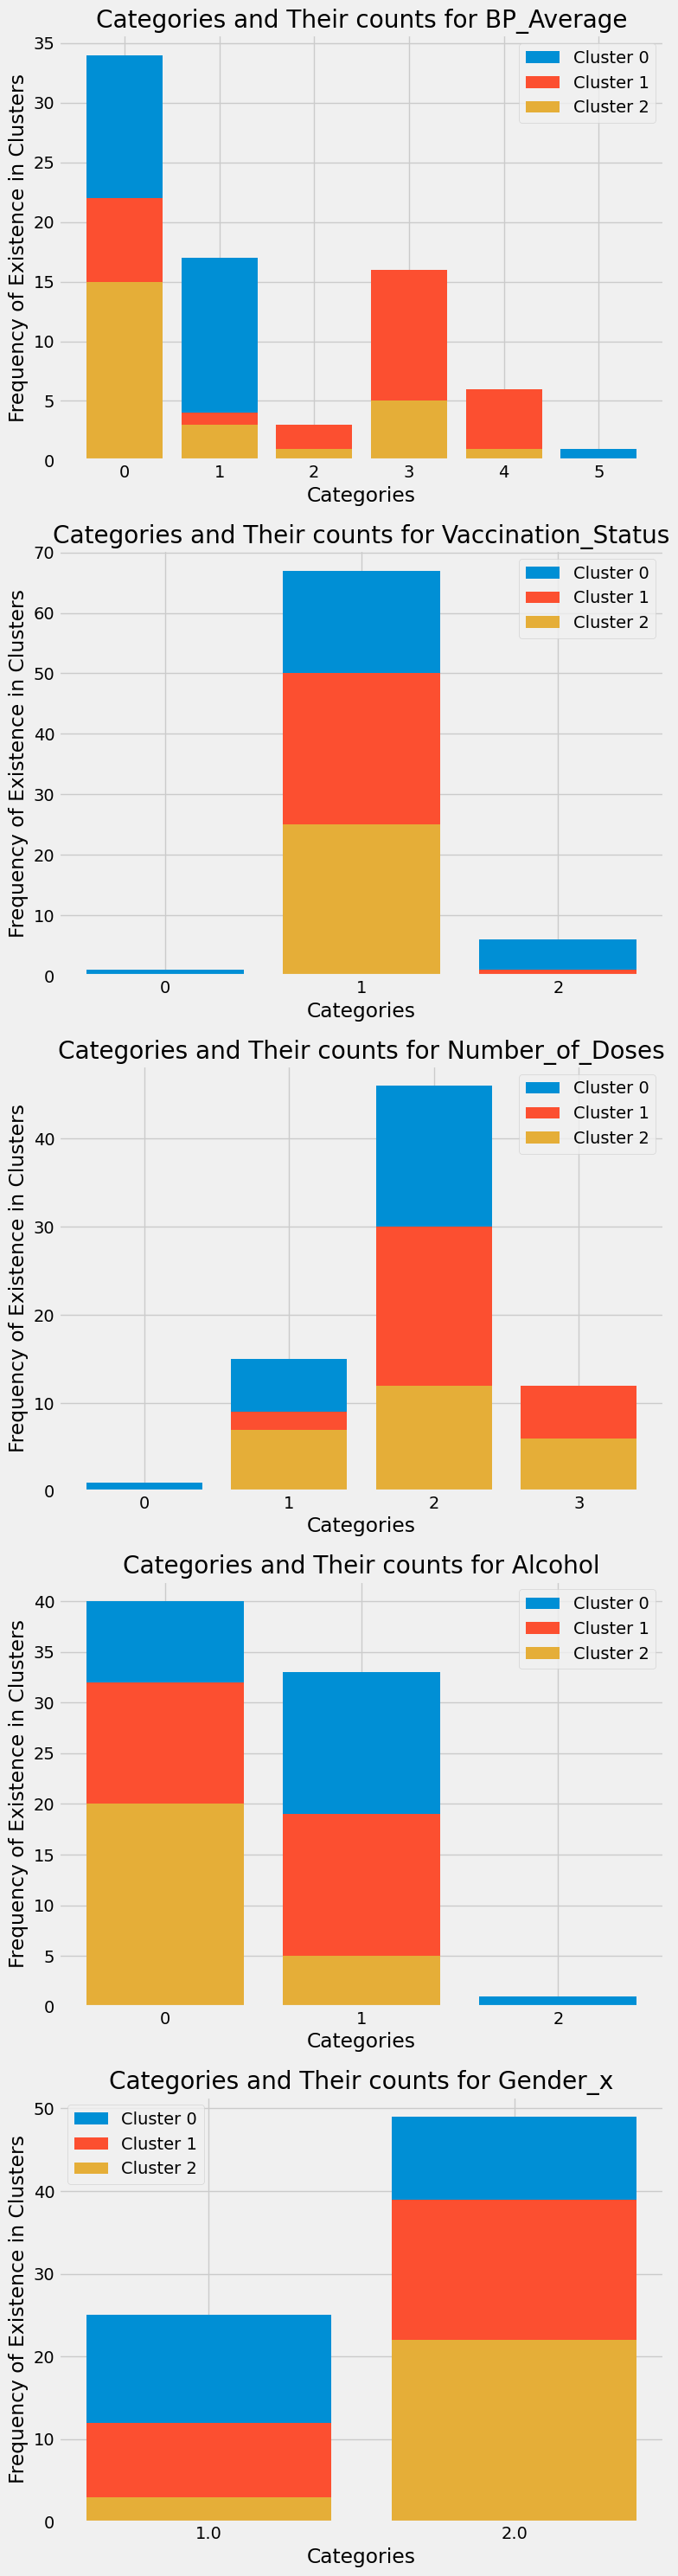

In [ ]:
features = list(data.keys())
clusters = list(data[features[0]].keys())

# Set up the figure and axes
fig, axes = plt.subplots(len(features), 1, figsize=(8,6 * len(features)))

# Create the grouped bar plot for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    cluster_data = data[feature]
    keys = set().union(*cluster_data.values())

    # Create the grouped bars for each cluster
    for j, cluster in enumerate(clusters):
        values = [cluster_data[cluster].get(key, 0) for key in keys]
        x = [str(key) for key in keys]  # Convert x-axis values to strings
        ax.bar(x, values, label=cluster)

    # Set the axis labels and title
    ax.set_xlabel('Categories')
    ax.set_ylabel('Frequency of Existence in Clusters')
    ax.set_title(f'Categories and Their counts for {feature}')
    ax.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Display the plots
plt.show()

## **Results Analysis**

Table Representation

In [ ]:
!pip install tabulate


In [ ]:
from tabulate import tabulate


In [ ]:
!pip install prettytable


In [ ]:
from prettytable import PrettyTable


In [ ]:
def find_range(lst):
    if len(lst) == 0:
        return None

    min_val = max_val = lst[0]

    for num in lst[1:]:
        if num < min_val:
            min_val = num
        elif num > max_val:
            max_val = num

    return (round(max_val,3), "-", round(min_val,3))

In [ ]:
# def find_range(lst):
#     if len(lst) == 0:
#         return None

#     min_val = max_val = lst[0]

#     for num in lst[1:]:
#         if num < min_val:
#             min_val = num
#         elif num > max_val:
#             max_val = num

#     return max_val - min_val

In [ ]:
Relevant_Features=['Weight','Waist_circumference','BMI', 'Age','Cholestrol', 'Glucose_Level']
# Relevant_Features=['Glucose_Level', 'Cholestrol', 'Temp', 'Weight', 'BMI', 'Height',
#        'Waist_circumference', 'HB', 'Gender_x', 'Age', 'HLE', 'Smoking',
#         'PA/week', 'HPT', 'Low/high_Blood_sugar', 'Fam_hx_CVD', 'Kidney_problems',
#        'Liver_problems','Number_of_Doses']

In [ ]:
T = PrettyTable(["Feature",
                       "C_0 Mean_Value/Count", "C_0 STD/Frequent", "C_0 Range",
                       "C_1 Mean_Value/Count", "C_1 STD/Frequent", "C_1 Range",
                       "C_2 Mean_Value/Count", "C_2 STD/Frequent", "C_2 Range"
                       ])

In [ ]:
# for i in Relevant_Features:
#   T.add_row([i, round(cluster_0[i].mean(),3), round(np.std(cluster_0[i]),3),round(find_range(list(cluster_0[i])),3),
#                round(cluster_1[i].mean(),3), round(np.std(cluster_1[i]),3),round(find_range(list(cluster_1[i])),3),
#                round(cluster_2[i].mean(),3), round(np.std(cluster_2[i]),3),round(find_range(list(cluster_2[i])),3),
#                round(cluster_3[i].mean(),3), round(np.std(cluster_3[i]),3),round(find_range(list(cluster_3[i])),3)])

In [ ]:
for i in Relevant_Features:
  T.add_row([i, round(cluster_0[i].mean(),3), round(np.std(cluster_0[i]),3),find_range(list(cluster_0[i])),
               round(cluster_1[i].mean(),3), round(np.std(cluster_1[i]),3),find_range(list(cluster_1[i])),
               round(cluster_2[i].mean(),3), round(np.std(cluster_2[i]),3),find_range(list(cluster_2[i]))
               ])

In [ ]:
T.add_row(['BP', cluster_0['BP_Average'].value_counts(), cluster_0['BP_Average'].value_counts()[0],find_range(list(cluster_0['BP_Average'])),
               cluster_1['BP_Average'].value_counts(), cluster_1['BP_Average'].value_counts()[0],find_range(list(cluster_1['BP_Average'])),
               cluster_2['BP_Average'].value_counts(), cluster_2['BP_Average'].value_counts()[0],find_range(list(cluster_2['BP_Average']))
               ])

In [ ]:
T.add_row(['Vaccination Status', cluster_0['Vaccination_Status'].value_counts(), cluster_0['Vaccination_Status'].value_counts().iloc[0],find_range(list(cluster_0['Vaccination_Status'])),
               cluster_1['Vaccination_Status'].value_counts(), cluster_1['Vaccination_Status'].value_counts().iloc[0],find_range(list(cluster_1['Vaccination_Status'])),
               cluster_2['Vaccination_Status'].value_counts(), cluster_2['Vaccination_Status'].value_counts().iloc[0],find_range(list(cluster_2['Vaccination_Status']))
               ])

In [ ]:
T.add_row(['Number of Doses', cluster_0['Number_of_Doses'].value_counts(), cluster_0['Number_of_Doses'].value_counts().iloc[0],find_range(list(cluster_0['Number_of_Doses'])),
               cluster_1['Number_of_Doses'].value_counts(), cluster_1['Number_of_Doses'].value_counts().iloc[0],find_range(list(cluster_1['Number_of_Doses'])),
               cluster_2['Number_of_Doses'].value_counts(), cluster_2['Number_of_Doses'].value_counts().iloc[0],find_range(list(cluster_2['Number_of_Doses']))
               ])

In [ ]:
T.add_row(['Gender', cluster_0['Gender_x'].value_counts(), cluster_0['Gender_x'].value_counts().iloc[0],find_range(list(cluster_0['Gender_x'])),
               cluster_1['Gender_x'].value_counts(), cluster_1['Gender_x'].value_counts().iloc[0],find_range(list(cluster_1['Gender_x'])),
               cluster_2['Gender_x'].value_counts(), cluster_2['Gender_x'].value_counts().iloc[0],find_range(list(cluster_2['Gender_x']))
               ])

In [ ]:
T.add_row(['Alcohol Consumption', cluster_0['Alcohol'].value_counts(), cluster_0['Alcohol'].value_counts().iloc[0],find_range(list(cluster_0['Alcohol'])),
               cluster_1['Alcohol'].value_counts(), cluster_1['Alcohol'].value_counts().iloc[0],find_range(list(cluster_1['Alcohol'])),
               cluster_2['Alcohol'].value_counts(), cluster_2['Alcohol'].value_counts().iloc[0],find_range(list(cluster_2['Alcohol']))
               ])

In [ ]:
cluster_1.columns

Index(['Glucose_Level', 'Cholestrol', 'Temp', 'Weight', 'BMI', 'Height',
       'Waist_circumference', 'HB', 'Gender_x', 'Age', 'HLE', 'Smoking',
       'Physical_activity', 'PA/week', 'PA level', 'HPT',
       'Low/high_Blood_sugar', 'Fam_hx_CVD', 'High_Chol', 'Kidney_problems',
       'Liver_problems', 'Vaccine_Type', 'Vaccination_Status',
       'Number_of_Doses', 'Side_Effects', 'Boosting_Status',
       'Symptoms_and_Treatment', 'Hospitalization', 'Co-Morbidities',
       'BP_Average', 'Weight_Category', 'Occupation', 'Marital_status',
       'Hazardous exposure', 'Alcohol', 'Symp_Cold', 'Symp_Cough',
       'Symp_Sore_throat', 'Symp_Headache', 'breathlessness', 'taste_Smell',
       'Close_to_Someonewith_Covid', 'COVID-19_comorbidities', 'Symp_Cold_i',
       'Symp_Cough_i', 'Symp_Sore_throat_i', 'Symp_Headache_i',
       'breathlessness_i', 'taste_Smell_i', 'Close_to_Someonewith_Covid_i',
       'break_through', 'Cluster'],
      dtype='object')

In [ ]:
T.add_row(['Break Through Infected', cluster_0['break_through'].value_counts(), cluster_0['break_through'].value_counts().iloc[0],find_range(list(cluster_0['break_through'])),
               cluster_1['break_through'].value_counts(), cluster_1['break_through'].value_counts().iloc[0],find_range(list(cluster_1['break_through'])),
               cluster_2['break_through'].value_counts(), cluster_2['break_through'].value_counts().iloc[0],find_range(list(cluster_2['break_through']))
               ])

In [ ]:
#@title Default title text

print(T)

+------------------------+----------------------------------------+------------------+--------------------+----------------------------------------+------------------+--------------------+----------------------------------------+------------------+---------------------+
|        Feature         |          C_0 Mean_Value/Count          | C_0 STD/Frequent |     C_0 Range      |          C_1 Mean_Value/Count          | C_1 STD/Frequent |     C_1 Range      |          C_2 Mean_Value/Count          | C_2 STD/Frequent |      C_2 Range      |
+------------------------+----------------------------------------+------------------+--------------------+----------------------------------------+------------------+--------------------+----------------------------------------+------------------+---------------------+
|         Weight         |                 86.27                  |      7.074       | (102.0, '-', 74.0) |                 63.471                 |       8.11       | (77.0, '-', 44.0)  

In [ ]:
cluster_0['Vaccine_Type'].value_counts()

1    53
0    21
Name: Vaccine_Type, dtype: int64

In [ ]:
cluster_0['break_through'].value_counts()

0    54
1    20
Name: break_through, dtype: int64

# Cluster 0

In [ ]:
# How many people in CLuster 0 were vaccinated with Pfizer and yet got BKI
pfizer_BKI=[]
for i,rows in cluster_0.iterrows():
  if(rows['Vaccine_Type']==1 and rows['break_through']==1):
    pfizer_BKI.append(i)
  else:
    continue
len(pfizer_BKI)

15

In [ ]:
# How many people in CLuster 0 were vaccinated with J&J and yet got BKI
J_J_BKI=[]
for i,rows in cluster_0.iterrows():
  if(rows['Vaccine_Type']==0 and rows['break_through']==1):
    J_J_BKI.append(i)
  else:
    continue
len(J_J_BKI)


5

## Cluster 1

In [ ]:
cluster_1['Vaccine_Type'].value_counts()

1    39
0    12
Name: Vaccine_Type, dtype: int64

In [ ]:
cluster_1['break_through'].value_counts()

0    42
1     9
Name: break_through, dtype: int64

In [ ]:
# How many people in CLuster 1 were vaccinated with Pfizer and yet got BKI
pfizer_BKI=[]
for i,rows in cluster_1.iterrows():
  if(rows['Vaccine_Type']==1 and rows['break_through']==1):
    pfizer_BKI.append(i)
  else:
    continue
len(pfizer_BKI)

7

In [ ]:
# How many people in CLuster 0 were vaccinated with J&J and yet got BKI
J_J_BKI=[]
for i,rows in cluster_1.iterrows():
  if(rows['Vaccine_Type']==0 and rows['break_through']==1):
    J_J_BKI.append(i)
  else:
    continue
len(J_J_BKI)

2

## Cluster 2

In [ ]:
cluster_2['Vaccine_Type'].value_counts()

1    17
0     8
Name: Vaccine_Type, dtype: int64

In [ ]:
cluster_2['break_through'].value_counts()

0    23
1     2
Name: break_through, dtype: int64

In [ ]:
# How many people in CLuster 2 were vaccinated with Pfizer and yet got BKI
pfizer_BKI=[]
for i,rows in cluster_2.iterrows():
  if(rows['Vaccine_Type']==1 and rows['break_through']==1):
    pfizer_BKI.append(i)
  else:
    continue
len(pfizer_BKI)

2

In [ ]:
# How many people in CLuster 0 were vaccinated with J&J and yet got BKI
J_J_BKI=[]
for i,rows in cluster_2.iterrows():
  if(rows['Vaccine_Type']==0 and rows['break_through']==1):
    J_J_BKI.append(i)
  else:
    continue
len(J_J_BKI)

0